## work in progress for final
Bryan Chi Fai Pang

Student ID: 501210081

TMU: The Chang School of Continuing Education

CIND 820 Big Data Analytics Project

Dr Ceni BABAOGLU

27 November 2023

#### Github Repository


https://github.com/bryantoca/capstone_project

Please note this notebook takse around 15 mintues to run / render.
An html version as well as NBViewer version are available on line.


### Helps for Codings

RESOURCES CONSULETD FOR CODES

To develop the codes related to Cross Validation, I have consulted the following resources:
 - *Machine Learning with Python for Everyone* by Mark E. Fenner.
 - www.stackoverflow.com
 - machinelearningmastery.com


 



### The Final results can be found in Part 4
To do directly, please click the link below

[Jump to Final Results](#final_results)


# Final Results and Project Report

## Part 1: Creation of Train, Validation, and Test Sets

1. **Train-Validate-Final Test Split:**

    - 80% train-validate split, 20% test set.
    - Anomaly records removed from train-validate sets.

2. **Training Validation Set**
    - abormal records removal
    - Strings converted to numeric using the following mapping:
        {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}



3. **Test Set**
    - abormal records removal
    - Strings converted to numeric using the following mapping:
        {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}




4. **Cross Validation Using Train Validation Set**


## Part 2: 10-fold Cross Validation with 3 selected models

Using the following models:

- Random Forest (n_estimators=100) (RF)
- Gradient Boosting Classifier (GB)
- XGB Classifier (XGB)

Subsets of the dataset of the train validation set.

Subsets:
1. S1: Academic, Macroeconomic
2. S2: Academic, Macroeconomics, Demographic
3. S3: Academic, Macroeconomics, Socioeconomic
4. S4: Academic, Macroeconomic, Demographic, Socioeconomic
5. S5: Demographic, Socioeconomic

Performance Metrics:
- Average Accuracy
- Average F1 Score
- Standard Deviation (SD)

## Part 3: Test Set Results with 3 selected models

Subsets of the dataset are trained and tested using Random Forest and XGB Classifier with 80-20 train-validate split.

Train validation set (80% of origital dataset)
1. S1: Academic, Macroeconomic
2. S2: Academic, Macroeconomics, Demographic
3. S3: Academic, Macroeconomics, Socioeconomic
4. S4: Academic, Macroeconomic, Demographic, Socioeconomic
5. S5: Demographic, Socioeconomic

Test set (20% of orgitial dataset)
1. t1: Academic, Macroeconomic
2. t2: Academic, Macroeconomics, Demographic
3. t3: Academic, Macroeconomics, Socioeconomic
4. t4: Academic, Macroeconomic, Demographic, Socioeconomic
5. t5: Demographic, Socioeconomic


Full Classification Reports are displayed for each subset.

## Part 4: Final Results Summary and Graphs

Random Forest Classifier

1. Train Validaiton Set results
2. Test Set results

Gradient Boosting Classifier

1. Train Validaiton Set results
2. Test Set results

XGB Classifier

1. Train Validaiton Set results
2. Test Set results


    

## Part 1: Creation of Train, Validation, and Test Sets

In [147]:
# import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier  
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from statistics import mean, stdev
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import tabulate
pd.set_option('display.float_format','{:.4f}'.format)
pd.set_option('display.max_columns', None)













In [148]:
# Using the datetime.now() at the beginning and at the end to check time 
# needed to run the codes.

# datetime object containing current date and time
Start = datetime.now()
 
print("Notebook started at ", Start )



Notebook started at  2023-11-26 18:22:34.814982


1. **Train-Validate-Final Test Split:**
    - 80% train-validate split, 20% test set (this test set is not use but for final test /results)
    

In [149]:
# creating train_valide and test_set 
# test_set is for final testing

df = pd.read_csv("data.csv",sep=";") 

#data = pd.read_csv("data_cat.csv", sep=";")

train_validate_set, test_set = train_test_split(df, test_size = 0.2, random_state=76)

### Train Validation Set 


Finding the anomalies of the data and remove them on the train validation set.


In [150]:

anomalies = train_validate_set[(train_validate_set['Target'] == 'Graduate') & (train_validate_set.iloc[:, 21:33].eq(0).all(axis=1))]
anomalies_to_print = anomalies[["Target"]+list(train_validate_set.columns[21:33])]
anomalies_to_print.head()


,Target,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
1889,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0
3135,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0
881,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0
789,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0
1512,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0


Saving them to drop later.

In [151]:
anomal = train_validate_set[(train_validate_set['Target'] == 'Graduate') & (train_validate_set.iloc[:, 21:33].eq(0).all(axis=1))]
anomal.index

Int64Index([1889, 3135,  881,  789, 1512,  527, 2194, 1192, 2920, 2637, 3405,
             557, 2387, 2026, 2008,  574, 2899, 3447,  101,  405, 3023, 4353,
            2356, 3160, 1350,  821, 3024,  869, 2371, 3707, 1751,  679, 4291,
            1658, 2508,  534, 1585, 2230, 1507, 3928, 2955, 3683, 2406, 1425,
              20, 2814, 1883, 4365, 2793, 2656, 3732, 3481,  728, 2124, 1890,
            1363, 3717,   66, 3317, 2328],
           dtype='int64')

In [152]:
# droping the abnormal recrods.
train_validate_set.drop(anomal.index,inplace=True)

**Target Mapping:**
    - Strings converted to numeric using the following mapping:
        {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

In [153]:
target_value_counts = train_validate_set['Target'].value_counts()

print(target_value_counts)

Graduate    1704
Dropout     1155
Enrolled     620
Name: Target, dtype: int64


### Maping the target to digits

In [154]:
# Create a mapping dicctionary for Target, as XGBoost take only numeric value.
mapping = {'Dropout':0, 'Enrolled':1, 'Graduate':2}

train_validate_set['Target']=train_validate_set['Target'].map(mapping)


train_validate_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479 entries, 2931 to 2721
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3479 non-null   int64  
 1   Application mode                                3479 non-null   int64  
 2   Application order                               3479 non-null   int64  
 3   Course                                          3479 non-null   int64  
 4   Daytime evening attendance                      3479 non-null   int64  
 5   Previous qualification                          3479 non-null   int64  
 6   Previous qualification (grade)                  3479 non-null   float64
 7   Nacionality                                     3479 non-null   int64  
 8   Mother's qualification                          3479 non-null   int64  
 9   Father's qualification                

### Test Set 

Finding the anomlaies in the test_set

In [155]:
test_anomalies = test_set[(test_set['Target'] == 'Graduate') & (test_set.iloc[:, 21:33].eq(0).all(axis=1))]
test_anomalies_to_print = test_anomalies[["Target"]+list(test_set.columns[21:33])]
test_anomalies_to_print.head()


,Target,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
3745,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0
1600,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0
2496,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0
2235,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0
1050,Graduate,0,0,0,0,0.0000,0,0,0,0,0,0.0000,0


Finding them and dropping them.

In [156]:
test_anomal = test_set[(test_set['Target'] == 'Graduate') & (test_set.iloc[:, 21:33].eq(0).all(axis=1))]
test_anomal.index

Int64Index([3745, 1600, 2496, 2235, 1050, 2143, 1002, 1302, 4370, 2175, 3946,
             722, 1377, 1575, 1898],
           dtype='int64')

In [157]:
test_set.drop(test_anomal.index,inplace=True)

In [158]:
test_target_value_counts = test_set['Target'].value_counts()

print(test_target_value_counts)

Graduate    430
Dropout     266
Enrolled    174
Name: Target, dtype: int64


In [159]:
# Create a mapping dicctionary for Target, as XGBoost take only numeric value.
mapping = {'Dropout':0, 'Enrolled':1, 'Graduate':2}

test_set['Target']=test_set['Target'].map(mapping)


test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 212 to 3679
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  870 non-null    int64  
 1   Application mode                                870 non-null    int64  
 2   Application order                               870 non-null    int64  
 3   Course                                          870 non-null    int64  
 4   Daytime evening attendance                      870 non-null    int64  
 5   Previous qualification                          870 non-null    int64  
 6   Previous qualification (grade)                  870 non-null    float64
 7   Nacionality                                     870 non-null    int64  
 8   Mother's qualification                          870 non-null    int64  
 9   Father's qualification                  

## Part 2: 10-fold Cross Validation with 3 selected models

Using the following models:

- Random Forest (n_estimators=10 and n_estimators=100)
- SVM with a linear kernel
- XGB Classifier

Subsets of the dataset of the train validation set.

Subsets:
1. S1: Academic, Macroeconomic
2. S2: Academic, Macroeconomics, Demographic
3. S3: Academic, Macroeconomics, Socioeconomic
4. S4: Academic, Macroeconomic, Demographic, Socioeconomic
5. S5: Demographic, Socioeconomic








Summary of these models saved as dataframe

Creating the subsets

In [160]:
demographic_columns = ['Marital status','Nacionality','Displaced','Gender','Age at enrollment','International']
socioeconomic_columns =["Mother's qualification","Father's qualification","Mother's occupation","Father's occupation",'Educational special needs','Debtor',
 'Tuition fees up to date','Scholarship holder']
macroeconomic_columns = ['Unemployment rate','Inflation rate','GDP']
academic_columns = [
 'Application mode',
 'Application order',
 'Course',
 'Daytime evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)'
 ]
target_s = ['Target']

### Creating the subset of the train_validation_set

In [161]:
s1 = train_validate_set[target_s + macroeconomic_columns + academic_columns]
s2 = train_validate_set[target_s + macroeconomic_columns + academic_columns + demographic_columns]
s3 = train_validate_set[target_s + macroeconomic_columns + academic_columns + socioeconomic_columns]
s4 = train_validate_set[target_s + macroeconomic_columns + academic_columns + socioeconomic_columns + demographic_columns]
s5 = train_validate_set[target_s + demographic_columns + socioeconomic_columns ]

In [162]:
# Grouping the subset for looping
dataframes = [s1, s2, s3, s4, s5]  

attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]

In [163]:
## Grouping the test set, which will be using in part 3
t1 = test_set[target_s + macroeconomic_columns + academic_columns]
t2 = test_set[target_s + macroeconomic_columns + academic_columns + demographic_columns]
t3 = test_set[target_s + macroeconomic_columns + academic_columns + socioeconomic_columns]
t4 = test_set[target_s + macroeconomic_columns + academic_columns + socioeconomic_columns + demographic_columns]
t5 = test_set[target_s + demographic_columns + socioeconomic_columns ]
test_data_frame = [t1, t2,t3,t4, t5]

Cross Validation with train validation set 
the summray is saved in a dataframe

In [164]:
##

## Random Forest 10 fold cross validation with train validatin set.


results_summary = []

for i, df in enumerate(dataframes, 1):
    target = df["Target"]
    features = df.drop("Target", axis=1)

    # Assuming you have a loop for folds
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=76)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=76)

    fold_metrics = {'Accuracy': [], 'Precision': {'Dropout': [], 'Enrolled': [], 'Graduate': []},
                    'Recall': {'Dropout': [], 'Enrolled': [], 'Graduate': []},
                    'F1-Score': {'Dropout': [], 'Enrolled': [], 'Graduate': []}}

    for j, (train_index, test_index) in enumerate(cv.split(features, target), 1):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_test)

        # Calculating metrics for each fold
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2], average=None)

        fold_metrics['Accuracy'].append(accuracy)
        fold_metrics['Precision']['Dropout'].append(precision[0])
        fold_metrics['Precision']['Enrolled'].append(precision[1])
        fold_metrics['Precision']['Graduate'].append(precision[2])
        fold_metrics['Recall']['Dropout'].append(recall[0])
        fold_metrics['Recall']['Enrolled'].append(recall[1])
        fold_metrics['Recall']['Graduate'].append(recall[2])
        fold_metrics['F1-Score']['Dropout'].append(f1[0])
        fold_metrics['F1-Score']['Enrolled'].append(f1[1])
        fold_metrics['F1-Score']['Graduate'].append(f1[2])

    # Calculate average metrics across folds for each subset
    avg_accuracy = np.mean(fold_metrics['Accuracy'])
    avg_precision_dropout = np.mean(fold_metrics['Precision']['Dropout'])
    avg_precision_enrolled = np.mean(fold_metrics['Precision']['Enrolled'])
    avg_precision_graduate = np.mean(fold_metrics['Precision']['Graduate'])
    avg_recall_dropout = np.mean(fold_metrics['Recall']['Dropout'])
    avg_recall_enrolled = np.mean(fold_metrics['Recall']['Enrolled'])
    avg_recall_graduate = np.mean(fold_metrics['Recall']['Graduate'])
    avg_f1_dropout = np.mean(fold_metrics['F1-Score']['Dropout'])
    avg_f1_enrolled = np.mean(fold_metrics['F1-Score']['Enrolled'])
    avg_f1_graduate = np.mean(fold_metrics['F1-Score']['Graduate'])

    # Calculate standard deviation across folds for each subset
    sd_accuracy = np.std(fold_metrics['Accuracy'])
    sd_precision_dropout = np.std(fold_metrics['Precision']['Dropout'])
    sd_precision_enrolled = np.std(fold_metrics['Precision']['Enrolled'])
    sd_precision_graduate = np.std(fold_metrics['Precision']['Graduate'])
    sd_recall_dropout = np.std(fold_metrics['Recall']['Dropout'])
    sd_recall_enrolled = np.std(fold_metrics['Recall']['Enrolled'])
    sd_recall_graduate = np.std(fold_metrics['Recall']['Graduate'])
    sd_f1_dropout = np.std(fold_metrics['F1-Score']['Dropout'])
    sd_f1_enrolled = np.std(fold_metrics['F1-Score']['Enrolled'])
    sd_f1_graduate = np.std(fold_metrics['F1-Score']['Graduate'])

    results_summary.append([f's{i}', ', '.join(attribute_groups[i - 1]),
                            avg_accuracy, sd_accuracy,
                            avg_precision_dropout, sd_precision_dropout,
                            avg_precision_enrolled, sd_precision_enrolled,
                            avg_precision_graduate, sd_precision_graduate,
                            avg_recall_dropout, sd_recall_dropout,
                            avg_recall_enrolled, sd_recall_enrolled,
                            avg_recall_graduate, sd_recall_graduate,
                            avg_f1_dropout, sd_f1_dropout,
                            avg_f1_enrolled, sd_f1_enrolled,
                            avg_f1_graduate, sd_f1_graduate])

# Creating a DataFrame for the summary
columns = ['Subset', 'Attribute Groups', 'Average Accuracy', 'SD Accuracy',
           'Average Precision (Dropout)', 'SD Precision (Dropout)',
           'Average Precision (Enrolled)', 'SD Precision (Enrolled)',
           'Average Precision (Graduate)', 'SD Precision (Graduate)',
           'Average Recall (Dropout)', 'SD Recall (Dropout)',
           'Average Recall (Enrolled)', 'SD Recall (Enrolled)',
           'Average Recall (Graduate)', 'SD Recall (Graduate)',
           'Average F1-Score (Dropout)', 'SD F1-Score (Dropout)',
           'Average F1-Score (Enrolled)', 'SD F1-Score (Enrolled)',
           'Average F1-Score (Graduate)', 'SD F1-Score (Graduate)']

RF_train_validate_df = pd.DataFrame(results_summary, columns=columns)

# Displaying the summary table
print("\nTrain_valide_Set:")
print("\nRF train validate Results")

RF_train_validate_df
RF_train_validate_md = RF_train_validate_df.to_markdown(index=False)




Train_valide_Set:

RF train validate Results


In [165]:
RF_train_validate_df

,Subset,Attribute Groups,Average Accuracy,SD Accuracy,Average Precision (Dropout),SD Precision (Dropout),Average Precision (Enrolled),SD Precision (Enrolled),Average Precision (Graduate),SD Precision (Graduate),Average Recall (Dropout),SD Recall (Dropout),Average Recall (Enrolled),SD Recall (Enrolled),Average Recall (Graduate),SD Recall (Graduate),Average F1-Score (Dropout),SD F1-Score (Dropout),Average F1-Score (Enrolled),SD F1-Score (Enrolled),Average F1-Score (Graduate),SD F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7525,0.0155,0.8001,0.0311,0.4757,0.0693,0.7783,0.0148,0.7394,0.0317,0.2806,0.0506,0.9331,0.0151,0.7682,0.0275,0.3515,0.0533,0.8485,0.0073
1,s2,"Academic, Macroeconomics, Demographic",0.7571,0.0183,0.7931,0.0410,0.4942,0.0547,0.7830,0.0194,0.7497,0.0344,0.2758,0.0486,0.9372,0.0141,0.7705,0.0340,0.3529,0.0517,0.8530,0.0118
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7833,0.0121,0.8389,0.0222,0.5639,0.0501,0.7953,0.0228,0.7871,0.0319,0.3323,0.0560,0.9449,0.0209,0.8118,0.0219,0.4147,0.0459,0.8631,0.0091
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7767,0.0151,0.8315,0.0268,0.5544,0.0838,0.7890,0.0234,0.7758,0.0314,0.3161,0.0555,0.9449,0.0178,0.8023,0.0247,0.3993,0.0553,0.8595,0.0104
4,s5,"Demographic, Socioeconomic",0.5824,0.0222,0.5999,0.0381,0.2676,0.0790,0.6224,0.0249,0.5940,0.0443,0.1435,0.0556,0.7341,0.0329,0.5964,0.0370,0.1857,0.0670,0.6736,0.0274


# RF Train Validate Set Results
| Subset   | Attribute_groups                                    |   Ave Accuracy RF (train-validate) |   Accuracy RF (test) |   Ave Accuracy GB (train-valide) |   Accuracy GD (test) |   Ave Accuracy XGB (train-validate) |   Accuracy XGB (test) |
|:---------|:----------------------------------------------------|-----------------------------------:|---------------------:|---------------------------------:|---------------------:|------------------------------------:|----------------------:|
| s1       | Academic, Macroeconomic                             |                           0.752514 |             0.763218 |                         0.759988 |             0.755172 |                            0.741303 |              0.747126 |
| s2       | Academic, Macroeconomics, Demographic               |                           0.757112 |             0.751724 |                         0.756249 |             0.766667 |                            0.749641 |              0.754023 |
| s3       | Academic, Macroeconomics, Socioeconomic             |                           0.783268 |             0.782759 |                         0.781255 |             0.766667 |                            0.776088 |              0.773563 |
| s4       | Academic, Macroeconomic, Demographic, Socioeconomic |                           0.776655 |             0.78046  |                         0.781258 |             0.770115 |                            0.780968 |              0.798851 |
| s5       | Demographic, Socioeconomic                          |                           0.582357 |             0.548276 |                         0.618277 |             0.611494 |                            0.597879 |              0.572414 |

In [166]:
# Define the subsets

#Cross valdiation with Gradien Descent
dataframes = [s1, s2, s3, s4, s5]  

# Define the attribute groups
attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]

# Define the global training and testing sets
X_train_global = train_validate_set.drop("Target", axis=1)
y_train_global = train_validate_set["Target"]
X_test_global = test_set.drop("Target", axis=1)
y_test_global = test_set["Target"]

results_summary = []

for i, df in enumerate(dataframes, 1):
    target = df["Target"]
    features = df.drop("Target", axis=1)

    # Assuming you have a loop for folds
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=76)
    GB_classifier = GradientBoostingClassifier( random_state=76)
   

    fold_metrics = {'Accuracy': [], 'Precision': {'Dropout': [], 'Enrolled': [], 'Graduate': []},
                    'Recall': {'Dropout': [], 'Enrolled': [], 'Graduate': []},
                    'F1-Score': {'Dropout': [], 'Enrolled': [], 'Graduate': []}}

    for j, (train_index, test_index) in enumerate(cv.split(features, target), 1):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        GB_classifier.fit(X_train, y_train)
        y_pred = GB_classifier.predict(X_test)

        # Calculating metrics for each fold
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2], average=None)

        fold_metrics['Accuracy'].append(accuracy)
        fold_metrics['Precision']['Dropout'].append(precision[0])
        fold_metrics['Precision']['Enrolled'].append(precision[1])
        fold_metrics['Precision']['Graduate'].append(precision[2])
        fold_metrics['Recall']['Dropout'].append(recall[0])
        fold_metrics['Recall']['Enrolled'].append(recall[1])
        fold_metrics['Recall']['Graduate'].append(recall[2])
        fold_metrics['F1-Score']['Dropout'].append(f1[0])
        fold_metrics['F1-Score']['Enrolled'].append(f1[1])
        fold_metrics['F1-Score']['Graduate'].append(f1[2])

    # Calculate average metrics across folds for each subset
    avg_accuracy = np.mean(fold_metrics['Accuracy'])
    avg_precision_dropout = np.mean(fold_metrics['Precision']['Dropout'])
    avg_precision_enrolled = np.mean(fold_metrics['Precision']['Enrolled'])
    avg_precision_graduate = np.mean(fold_metrics['Precision']['Graduate'])
    avg_recall_dropout = np.mean(fold_metrics['Recall']['Dropout'])
    avg_recall_enrolled = np.mean(fold_metrics['Recall']['Enrolled'])
    avg_recall_graduate = np.mean(fold_metrics['Recall']['Graduate'])
    avg_f1_dropout = np.mean(fold_metrics['F1-Score']['Dropout'])
    avg_f1_enrolled = np.mean(fold_metrics['F1-Score']['Enrolled'])
    avg_f1_graduate = np.mean(fold_metrics['F1-Score']['Graduate'])

    # Calculate standard deviation across folds for each subset
    sd_accuracy = np.std(fold_metrics['Accuracy'])
    sd_precision_dropout = np.std(fold_metrics['Precision']['Dropout'])
    sd_precision_enrolled = np.std(fold_metrics['Precision']['Enrolled'])
    sd_precision_graduate = np.std(fold_metrics['Precision']['Graduate'])
    sd_recall_dropout = np.std(fold_metrics['Recall']['Dropout'])
    sd_recall_enrolled = np.std(fold_metrics['Recall']['Enrolled'])
    sd_recall_graduate = np.std(fold_metrics['Recall']['Graduate'])
    sd_f1_dropout = np.std(fold_metrics['F1-Score']['Dropout'])
    sd_f1_enrolled = np.std(fold_metrics['F1-Score']['Enrolled'])
    sd_f1_graduate = np.std(fold_metrics['F1-Score']['Graduate'])

    results_summary.append([f's{i}', ', '.join(attribute_groups[i - 1]),
                            avg_accuracy, sd_accuracy,
                            avg_precision_dropout, sd_precision_dropout,
                            avg_precision_enrolled, sd_precision_enrolled,
                            avg_precision_graduate, sd_precision_graduate,
                            avg_recall_dropout, sd_recall_dropout,
                            avg_recall_enrolled, sd_recall_enrolled,
                            avg_recall_graduate, sd_recall_graduate,
                            avg_f1_dropout, sd_f1_dropout,
                            avg_f1_enrolled, sd_f1_enrolled,
                            avg_f1_graduate, sd_f1_graduate])

# Creating a DataFrame for the summary
columns = ['Subset', 'Attribute Groups', 'Average Accuracy', 'SD Accuracy',
           'Average Precision (Dropout)', 'SD Precision (Dropout)',
           'Average Precision (Enrolled)', 'SD Precision (Enrolled)',
           'Average Precision (Graduate)', 'SD Precision (Graduate)',
           'Average Recall (Dropout)', 'SD Recall (Dropout)',
           'Average Recall (Enrolled)', 'SD Recall (Enrolled)',
           'Average Recall (Graduate)', 'SD Recall (Graduate)',
           'Average F1-Score (Dropout)', 'SD F1-Score (Dropout)',
           'Average F1-Score (Enrolled)', 'SD F1-Score (Enrolled)',
           'Average F1-Score (Graduate)', 'SD F1-Score (Graduate)']





GB_train_validate_df = pd.DataFrame(results_summary, columns=columns)

# Displaying the summary table
print("\nTrain_valide_Set:")
print("\nGB train validate Results")



GB_train_validate_df
GB_train_validate_md = GB_train_validate_df.to_markdown(index=False)





Train_valide_Set:

GB train validate Results


In [167]:
GB_train_validate_df

,Subset,Attribute Groups,Average Accuracy,SD Accuracy,Average Precision (Dropout),SD Precision (Dropout),Average Precision (Enrolled),SD Precision (Enrolled),Average Precision (Graduate),SD Precision (Graduate),Average Recall (Dropout),SD Recall (Dropout),Average Recall (Enrolled),SD Recall (Enrolled),Average Recall (Graduate),SD Recall (Graduate),Average F1-Score (Dropout),SD F1-Score (Dropout),Average F1-Score (Enrolled),SD F1-Score (Enrolled),Average F1-Score (Graduate),SD F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7600,0.0184,0.8035,0.0313,0.4971,0.0518,0.7866,0.0189,0.7454,0.0309,0.2968,0.0409,0.9384,0.0191,0.7731,0.0285,0.3696,0.0368,0.8556,0.0126
1,s2,"Academic, Macroeconomics, Demographic",0.7562,0.0161,0.8012,0.0301,0.4827,0.0545,0.7846,0.0205,0.7385,0.0301,0.2919,0.0447,0.9372,0.0181,0.7684,0.0274,0.3620,0.0422,0.8539,0.0126
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7813,0.0181,0.8397,0.0292,0.5487,0.0523,0.7993,0.0285,0.7714,0.0355,0.3629,0.0704,0.9402,0.0178,0.8036,0.0263,0.4338,0.0614,0.8636,0.0165
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7813,0.0172,0.8394,0.0234,0.5450,0.0564,0.8011,0.0279,0.7714,0.0259,0.3661,0.0645,0.9390,0.0163,0.8037,0.0202,0.4355,0.0588,0.8642,0.0160
4,s5,"Demographic, Socioeconomic",0.6183,0.0196,0.6578,0.0435,0.4325,0.1240,0.6078,0.0124,0.5793,0.0350,0.0532,0.0192,0.8503,0.0257,0.6156,0.0353,0.0943,0.0328,0.7088,0.0161


# GB Train Validate Set Results
| Subset   | Attribute Groups                                    |   Average Accuracy |   SD Accuracy |   Average Precision (Dropout) |   SD Precision (Dropout) |   Average Precision (Enrolled) |   SD Precision (Enrolled) |   Average Precision (Graduate) |   SD Precision (Graduate) |   Average Recall (Dropout) |   SD Recall (Dropout) |   Average Recall (Enrolled) |   SD Recall (Enrolled) |   Average Recall (Graduate) |   SD Recall (Graduate) |   Average F1-Score (Dropout) |   SD F1-Score (Dropout) |   Average F1-Score (Enrolled) |   SD F1-Score (Enrolled) |   Average F1-Score (Graduate) |   SD F1-Score (Graduate) |
|:---------|:----------------------------------------------------|-------------------:|--------------:|------------------------------:|-------------------------:|-------------------------------:|--------------------------:|-------------------------------:|--------------------------:|---------------------------:|----------------------:|----------------------------:|-----------------------:|----------------------------:|-----------------------:|-----------------------------:|------------------------:|------------------------------:|-------------------------:|------------------------------:|-------------------------:|
| s1       | Academic, Macroeconomic                             |           0.759988 |     0.0183727 |                      0.803459 |                0.0313451 |                       0.497096 |                 0.0517605 |                       0.786643 |                 0.0189355 |                   0.74545  |             0.030942  |                   0.296774  |              0.0409309 |                    0.9384   |              0.0190562 |                     0.773146 |               0.0284938 |                     0.36963   |                0.0367982 |                      0.855599 |                0.0126399 |
| s2       | Academic, Macroeconomics, Demographic               |           0.756249 |     0.0160838 |                      0.801246 |                0.0301192 |                       0.482739 |                 0.05448   |                       0.784627 |                 0.0205118 |                   0.738531 |             0.0300697 |                   0.291935  |              0.0447272 |                    0.937234 |              0.0180591 |                     0.768378 |               0.0273657 |                     0.36202   |                0.0422038 |                      0.853886 |                0.0125763 |
| s3       | Academic, Macroeconomics, Socioeconomic             |           0.781255 |     0.0181111 |                      0.839694 |                0.0292113 |                       0.548703 |                 0.0522548 |                       0.799328 |                 0.0284656 |                   0.771447 |             0.0354852 |                   0.362903  |              0.0703973 |                    0.940165 |              0.0178303 |                     0.803574 |               0.0263055 |                     0.433796  |                0.0614214 |                      0.863624 |                0.0165364 |
| s4       | Academic, Macroeconomic, Demographic, Socioeconomic |           0.781258 |     0.0171777 |                      0.839377 |                0.0233664 |                       0.545044 |                 0.056359  |                       0.801072 |                 0.0278898 |                   0.771432 |             0.0259198 |                   0.366129  |              0.0645363 |                    0.938992 |              0.0163073 |                     0.803689 |               0.0201697 |                     0.435534  |                0.0588112 |                      0.864174 |                0.016036  |
| s5       | Demographic, Socioeconomic                          |           0.618277 |     0.0195541 |                      0.657816 |                0.0434669 |                       0.43246  |                 0.124045  |                       0.607762 |                 0.0123671 |                   0.579303 |             0.0349535 |                   0.0532258 |              0.0191522 |                    0.85032  |              0.0256896 |                     0.615644 |               0.0353231 |                     0.0942585 |                0.0327574 |                      0.70879  |                0.0161137 |

In [168]:
##

#Cross-validiotn with XGBoost 

results_summary = []

for i, df in enumerate(dataframes, 1):
    target = df["Target"]
    features = df.drop("Target", axis=1)

    # Assuming you have a loop for folds
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=76)
    xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3, random_state=76)
    
   

    fold_metrics = {'Accuracy': [], 'Precision': {'Dropout': [], 'Enrolled': [], 'Graduate': []},
                    'Recall': {'Dropout': [], 'Enrolled': [], 'Graduate': []},
                    'F1-Score': {'Dropout': [], 'Enrolled': [], 'Graduate': []}}

    for j, (train_index, test_index) in enumerate(cv.split(features, target), 1):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        xgb_classifier.fit(X_train, y_train)
        y_pred = xgb_classifier.predict(X_test)

        # Calculating metrics for each fold
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2], average=None)

        fold_metrics['Accuracy'].append(accuracy)
        fold_metrics['Precision']['Dropout'].append(precision[0])
        fold_metrics['Precision']['Enrolled'].append(precision[1])
        fold_metrics['Precision']['Graduate'].append(precision[2])
        fold_metrics['Recall']['Dropout'].append(recall[0])
        fold_metrics['Recall']['Enrolled'].append(recall[1])
        fold_metrics['Recall']['Graduate'].append(recall[2])
        fold_metrics['F1-Score']['Dropout'].append(f1[0])
        fold_metrics['F1-Score']['Enrolled'].append(f1[1])
        fold_metrics['F1-Score']['Graduate'].append(f1[2])

    # Calculate average metrics across folds for each subset
    avg_accuracy = np.mean(fold_metrics['Accuracy'])
    avg_precision_dropout = np.mean(fold_metrics['Precision']['Dropout'])
    avg_precision_enrolled = np.mean(fold_metrics['Precision']['Enrolled'])
    avg_precision_graduate = np.mean(fold_metrics['Precision']['Graduate'])
    avg_recall_dropout = np.mean(fold_metrics['Recall']['Dropout'])
    avg_recall_enrolled = np.mean(fold_metrics['Recall']['Enrolled'])
    avg_recall_graduate = np.mean(fold_metrics['Recall']['Graduate'])
    avg_f1_dropout = np.mean(fold_metrics['F1-Score']['Dropout'])
    avg_f1_enrolled = np.mean(fold_metrics['F1-Score']['Enrolled'])
    avg_f1_graduate = np.mean(fold_metrics['F1-Score']['Graduate'])

    # Calculate standard deviation across folds for each subset
    sd_accuracy = np.std(fold_metrics['Accuracy'])
    sd_precision_dropout = np.std(fold_metrics['Precision']['Dropout'])
    sd_precision_enrolled = np.std(fold_metrics['Precision']['Enrolled'])
    sd_precision_graduate = np.std(fold_metrics['Precision']['Graduate'])
    sd_recall_dropout = np.std(fold_metrics['Recall']['Dropout'])
    sd_recall_enrolled = np.std(fold_metrics['Recall']['Enrolled'])
    sd_recall_graduate = np.std(fold_metrics['Recall']['Graduate'])
    sd_f1_dropout = np.std(fold_metrics['F1-Score']['Dropout'])
    sd_f1_enrolled = np.std(fold_metrics['F1-Score']['Enrolled'])
    sd_f1_graduate = np.std(fold_metrics['F1-Score']['Graduate'])

    results_summary.append([f's{i}', ', '.join(attribute_groups[i - 1]),
                            avg_accuracy, sd_accuracy,
                            avg_precision_dropout, sd_precision_dropout,
                            avg_precision_enrolled, sd_precision_enrolled,
                            avg_precision_graduate, sd_precision_graduate,
                            avg_recall_dropout, sd_recall_dropout,
                            avg_recall_enrolled, sd_recall_enrolled,
                            avg_recall_graduate, sd_recall_graduate,
                            avg_f1_dropout, sd_f1_dropout,
                            avg_f1_enrolled, sd_f1_enrolled,
                            avg_f1_graduate, sd_f1_graduate])

# Creating a DataFrame for the summary
columns = ['Subset', 'Attribute Groups', 'Average Accuracy', 'SD Accuracy',
           'Average Precision (Dropout)', 'SD Precision (Dropout)',
           'Average Precision (Enrolled)', 'SD Precision (Enrolled)',
           'Average Precision (Graduate)', 'SD Precision (Graduate)',
           'Average Recall (Dropout)', 'SD Recall (Dropout)',
           'Average Recall (Enrolled)', 'SD Recall (Enrolled)',
           'Average Recall (Graduate)', 'SD Recall (Graduate)',
           'Average F1-Score (Dropout)', 'SD F1-Score (Dropout)',
           'Average F1-Score (Enrolled)', 'SD F1-Score (Enrolled)',
           'Average F1-Score (Graduate)', 'SD F1-Score (Graduate)']




print("\nXGB Summary DataFrame:")



XGB_train_validate_df = pd.DataFrame(results_summary, columns=columns)

# Displaying the summary table
print("\nTrain_valide_Set:")
print("\nXGB train validate Results")

XGB_train_validate_df

XGB_train_validate_md = XGB_train_validate_df.to_markdown(index=False)




XGB Summary DataFrame:

Train_valide_Set:

XGB train validate Results


In [169]:

XGB_train_validate_df

,Subset,Attribute Groups,Average Accuracy,SD Accuracy,Average Precision (Dropout),SD Precision (Dropout),Average Precision (Enrolled),SD Precision (Enrolled),Average Precision (Graduate),SD Precision (Graduate),Average Recall (Dropout),SD Recall (Dropout),Average Recall (Enrolled),SD Recall (Enrolled),Average Recall (Graduate),SD Recall (Graduate),Average F1-Score (Dropout),SD F1-Score (Dropout),Average F1-Score (Enrolled),SD F1-Score (Enrolled),Average F1-Score (Graduate),SD F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7413,0.0158,0.7717,0.0310,0.4250,0.0591,0.7937,0.0214,0.7264,0.0289,0.2968,0.0726,0.9132,0.0144,0.7481,0.0255,0.3475,0.0681,0.8490,0.0122
1,s2,"Academic, Macroeconomics, Demographic",0.7496,0.0153,0.7780,0.0306,0.4621,0.0598,0.7987,0.0193,0.7299,0.0360,0.3210,0.0481,0.9190,0.0144,0.7528,0.0294,0.3773,0.0469,0.8544,0.0106
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7761,0.0204,0.8331,0.0291,0.5234,0.0802,0.8056,0.0232,0.7715,0.0352,0.3806,0.0707,0.9232,0.0247,0.8007,0.0280,0.4376,0.0694,0.8599,0.0118
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7810,0.0155,0.8300,0.0275,0.5329,0.0549,0.8145,0.0244,0.7784,0.0304,0.3919,0.0510,0.9243,0.0192,0.8029,0.0225,0.4494,0.0430,0.8655,0.0113
4,s5,"Demographic, Socioeconomic",0.5979,0.0252,0.6254,0.0276,0.3091,0.0557,0.6219,0.0255,0.5681,0.0588,0.1387,0.0290,0.7852,0.0345,0.5946,0.0435,0.1904,0.0356,0.6939,0.0277


# XGB Train Validate Set Results
| Subset   | Attribute Groups                                    |   Average Accuracy |   SD Accuracy |   Average Precision (Dropout) |   SD Precision (Dropout) |   Average Precision (Enrolled) |   SD Precision (Enrolled) |   Average Precision (Graduate) |   SD Precision (Graduate) |   Average Recall (Dropout) |   SD Recall (Dropout) |   Average Recall (Enrolled) |   SD Recall (Enrolled) |   Average Recall (Graduate) |   SD Recall (Graduate) |   Average F1-Score (Dropout) |   SD F1-Score (Dropout) |   Average F1-Score (Enrolled) |   SD F1-Score (Enrolled) |   Average F1-Score (Graduate) |   SD F1-Score (Graduate) |
|:---------|:----------------------------------------------------|-------------------:|--------------:|------------------------------:|-------------------------:|-------------------------------:|--------------------------:|-------------------------------:|--------------------------:|---------------------------:|----------------------:|----------------------------:|-----------------------:|----------------------------:|-----------------------:|-----------------------------:|------------------------:|------------------------------:|-------------------------:|------------------------------:|-------------------------:|
| s1       | Academic, Macroeconomic                             |           0.741303 |     0.0157686 |                      0.77172  |                0.0310191 |                       0.424954 |                 0.0590765 |                       0.793712 |                 0.0214077 |                   0.726417 |             0.0288551 |                    0.296774 |              0.0725627 |                    0.913161 |              0.0144423 |                     0.748061 |               0.0255004 |                      0.347534 |                0.0680682 |                      0.849002 |                0.0122048 |
| s2       | Academic, Macroeconomics, Demographic               |           0.749641 |     0.0152842 |                      0.778011 |                0.0305685 |                       0.462127 |                 0.0597697 |                       0.798726 |                 0.0192871 |                   0.72985  |             0.036013  |                    0.320968 |              0.0480905 |                    0.919013 |              0.0143541 |                     0.752799 |               0.0293712 |                      0.377269 |                0.0468531 |                      0.854429 |                0.0106491 |
| s3       | Academic, Macroeconomics, Socioeconomic             |           0.776088 |     0.0204261 |                      0.833103 |                0.0291352 |                       0.523353 |                 0.0801844 |                       0.805604 |                 0.0231528 |                   0.771462 |             0.0352325 |                    0.380645 |              0.0707475 |                    0.923165 |              0.0246749 |                     0.800713 |               0.0279989 |                      0.437612 |                0.0694032 |                      0.859871 |                0.0117558 |
| s4       | Academic, Macroeconomic, Demographic, Socioeconomic |           0.780968 |     0.0155119 |                      0.830022 |                0.0274875 |                       0.532906 |                 0.0548554 |                       0.814513 |                 0.0244071 |                   0.778366 |             0.0304386 |                    0.391935 |              0.05103   |                    0.924327 |              0.0192081 |                     0.802914 |               0.0225349 |                      0.449402 |                0.0430236 |                      0.865511 |                0.0113173 |
| s5       | Demographic, Socioeconomic                          |           0.597879 |     0.0252321 |                      0.625381 |                0.027583  |                       0.309111 |                 0.0557343 |                       0.621877 |                 0.0254684 |                   0.568073 |             0.0587682 |                    0.13871  |              0.0290323 |                    0.785212 |              0.0345003 |                     0.594632 |               0.0434956 |                      0.190381 |                0.0355827 |                      0.693939 |                0.027689  |

## Part 3: The Three models trained with train-validation set and test with test set.
Using the following models:

- Random Forest (n_estimators=10 and n_estimators=100)
- SVM with a linear kernel
- XGB Classifier

Subsets of the dataset of the train validation set.

Subsets:  # [train validation set]
1. S1: Academic, Macroeconomic
2. S2: Academic, Macroeconomics, Demographic
3. S3: Academic, Macroeconomics, Socioeconomic
4. S4: Academic, Macroeconomic, Demographic, Socioeconomic
5. S5: Demographic, Socioeconomic

Subsets:  # [train set]
1. t1: Academic, Macroeconomic
2. t2: Academic, Macroeconomics, Demographic
3. t3: Academic, Macroeconomics, Socioeconomic
4. t4: Academic, Macroeconomic, Demographic, Socioeconomic
5. t5: Demographic, Socioeconomic

The Results are saved in a dataframe for each algorthims. 

After each subset is run the following are printed
Classification Report 
2 confusion matrix (one noraml and anothre normalized)
Future importances 

dataframes are created to store the metrix.


Results for s1 and t1:
Attribute Groups: Academic, Macroeconomic
Accuracy: 0.7632
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.74      0.78      0.76       266
    Enrolled       0.52      0.26      0.35       174
    Graduate       0.82      0.96      0.88       430

    accuracy                           0.76       870
   macro avg       0.69      0.67      0.66       870
weighted avg       0.73      0.76      0.74       870



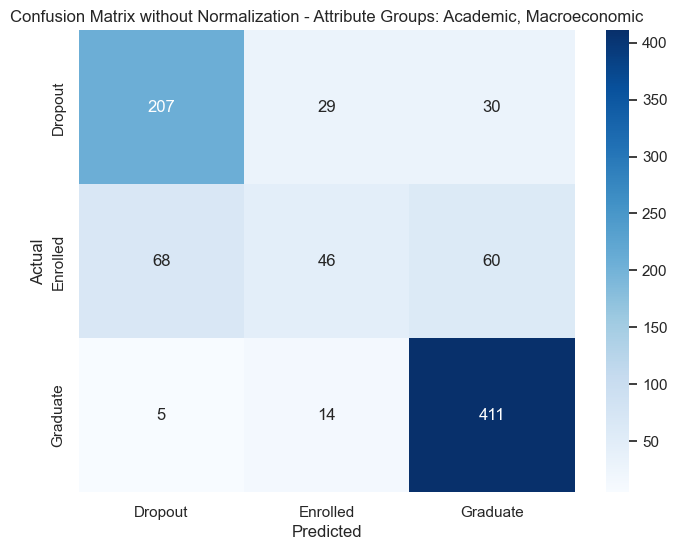

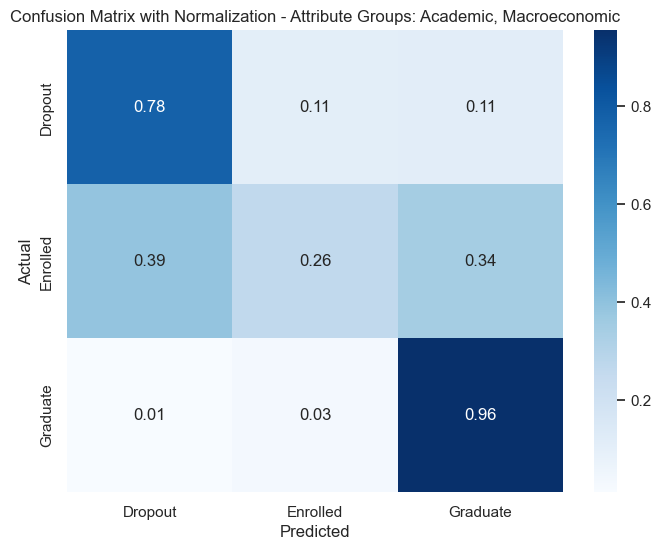

Top five Feature Importance:
                                Feature  Importance
19  Curricular units 2nd sem (approved)      0.1799
13  Curricular units 1st sem (approved)      0.1218
20     Curricular units 2nd sem (grade)      0.1113
14     Curricular units 1st sem (grade)      0.0867
9                       Admission grade      0.0640


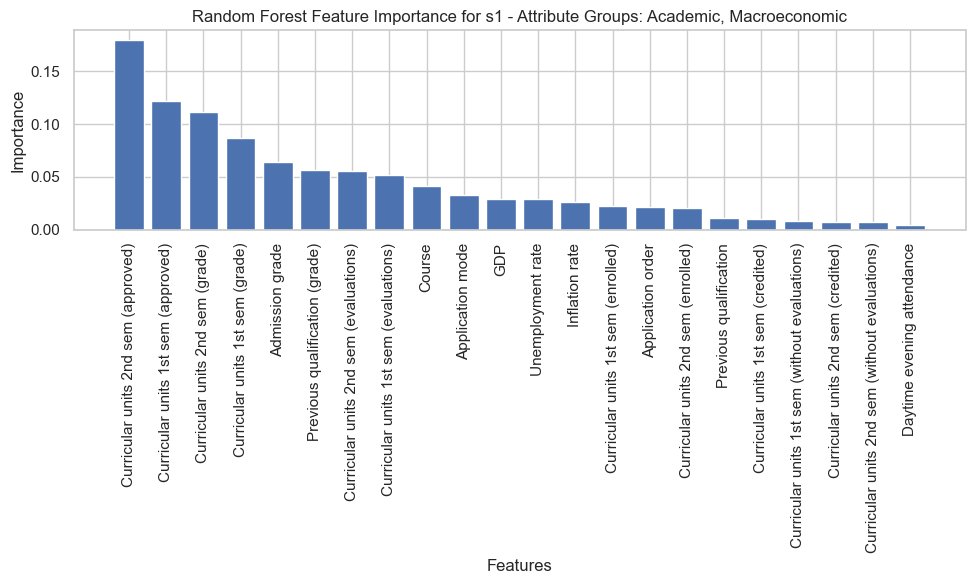

-------------------------------------------------------------

Results for s2 and t2:
Attribute Groups: Academic, Macroeconomics, Demographic
Accuracy: 0.7517
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.75      0.76      0.76       266
    Enrolled       0.48      0.26      0.34       174
    Graduate       0.80      0.94      0.87       430

    accuracy                           0.75       870
   macro avg       0.68      0.66      0.65       870
weighted avg       0.72      0.75      0.73       870



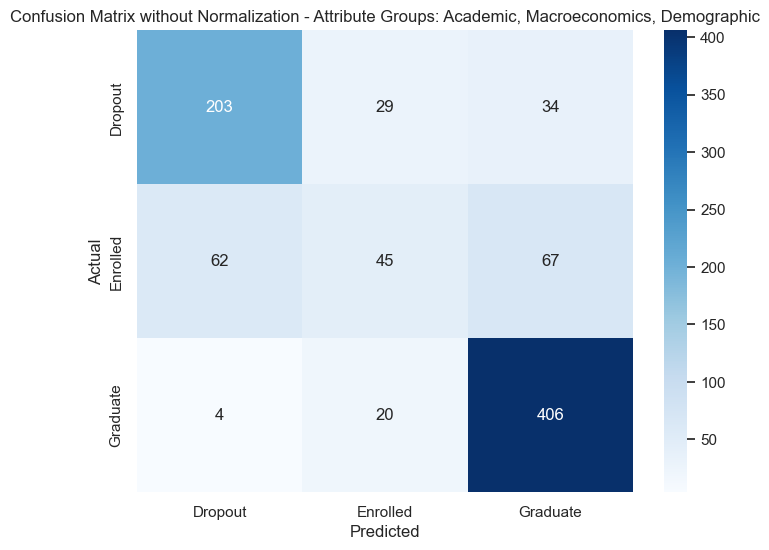

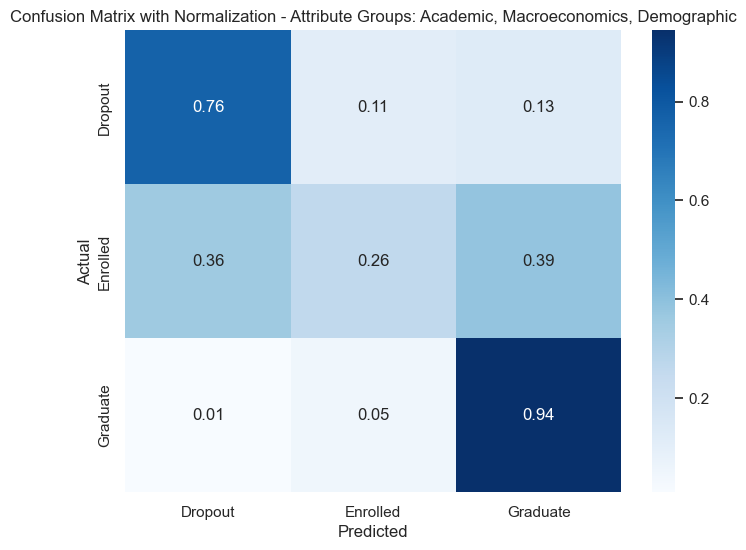

Top five Feature Importance:
                                Feature  Importance
19  Curricular units 2nd sem (approved)      0.1765
20     Curricular units 2nd sem (grade)      0.1139
13  Curricular units 1st sem (approved)      0.1053
14     Curricular units 1st sem (grade)      0.0800
9                       Admission grade      0.0534


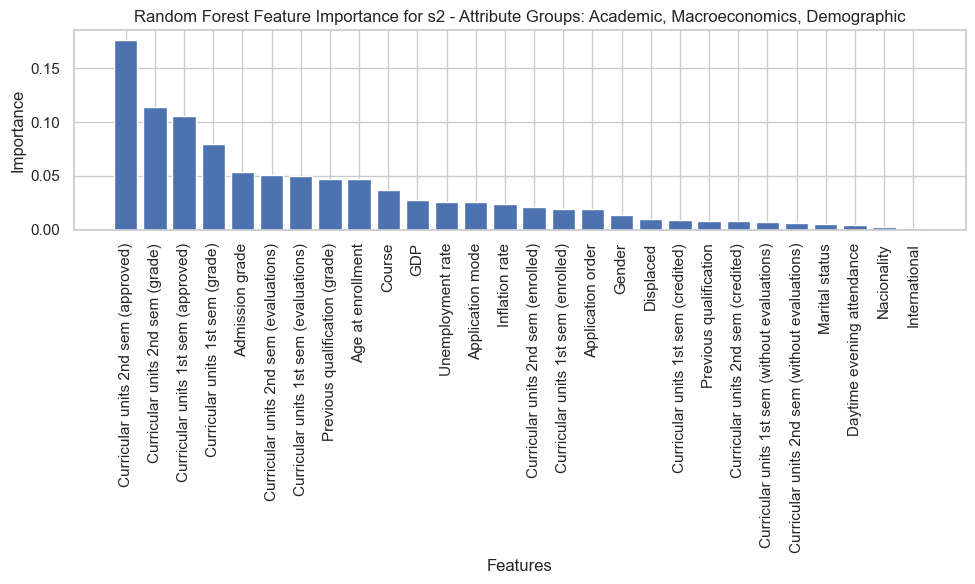

-------------------------------------------------------------

Results for s3 and t3:
Attribute Groups: Academic, Macroeconomics, Socioeconomic
Accuracy: 0.7828
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.78      0.80      0.79       266
    Enrolled       0.63      0.34      0.44       174
    Graduate       0.81      0.95      0.88       430

    accuracy                           0.78       870
   macro avg       0.74      0.70      0.70       870
weighted avg       0.77      0.78      0.76       870



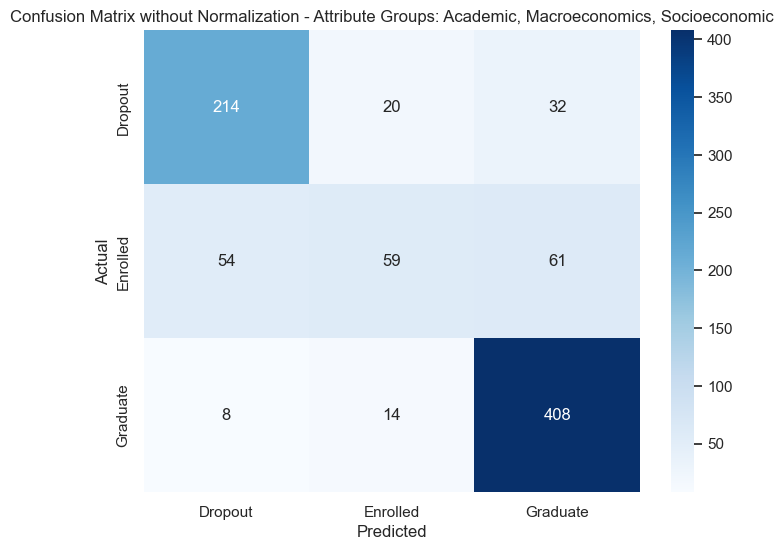

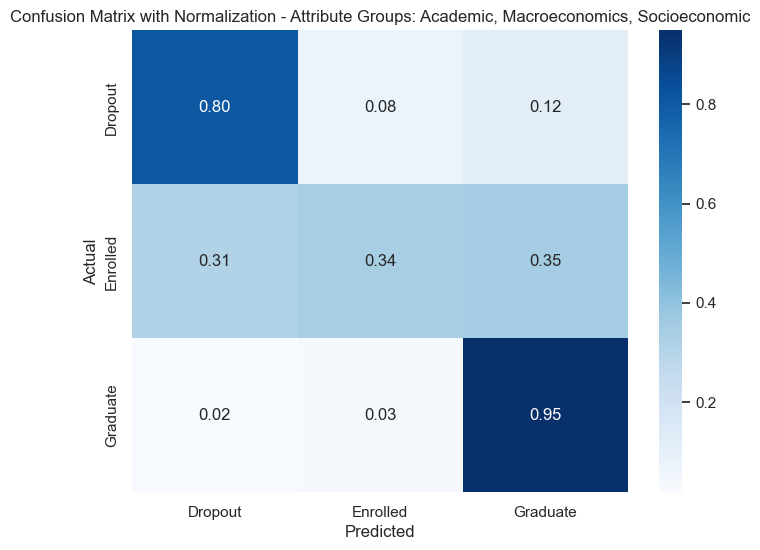

Top five Feature Importance:
                                   Feature  Importance
19     Curricular units 2nd sem (approved)      0.1703
20        Curricular units 2nd sem (grade)      0.1057
13     Curricular units 1st sem (approved)      0.1010
14        Curricular units 1st sem (grade)      0.0658
18  Curricular units 2nd sem (evaluations)      0.0453


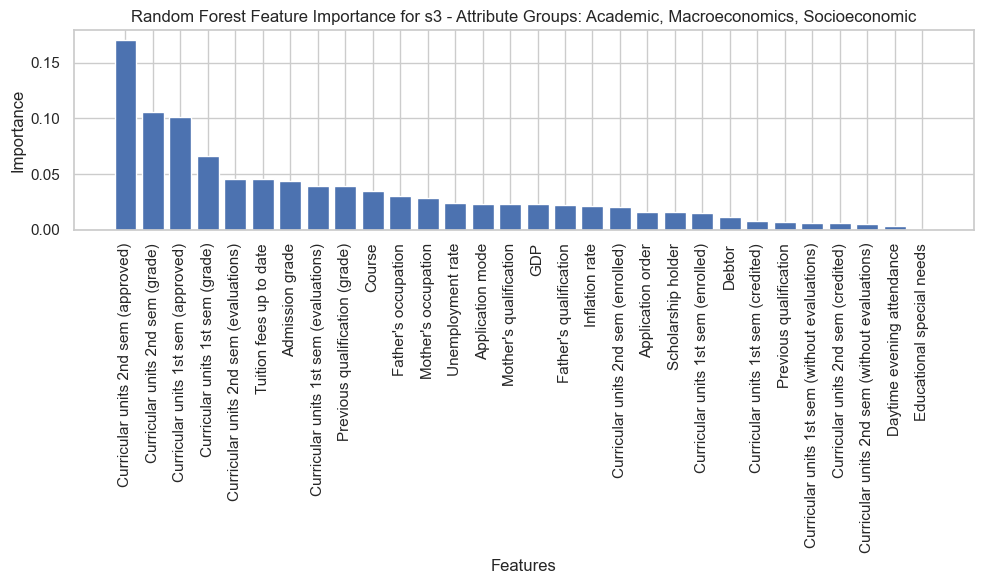

-------------------------------------------------------------

Results for s4 and t4:
Attribute Groups: Academic, Macroeconomic, Demographic, Socioeconomic
Accuracy: 0.7805
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.78      0.80      0.79       266
    Enrolled       0.62      0.33      0.43       174
    Graduate       0.81      0.95      0.87       430

    accuracy                           0.78       870
   macro avg       0.74      0.69      0.70       870
weighted avg       0.76      0.78      0.76       870



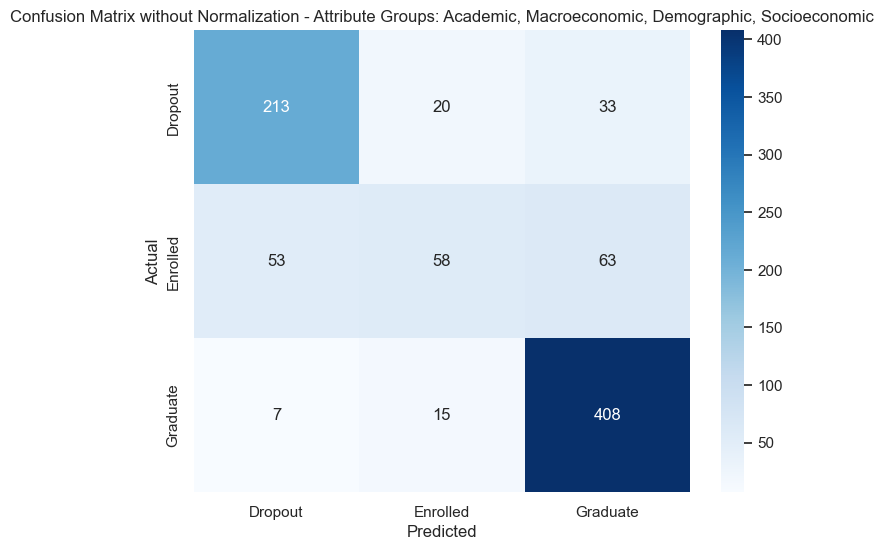

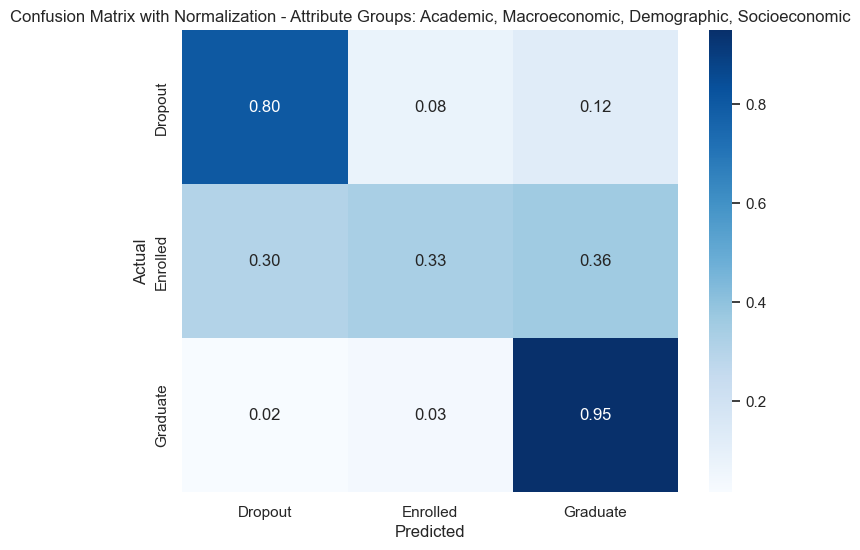

Top five Feature Importance:
                                Feature  Importance
19  Curricular units 2nd sem (approved)      0.1523
20     Curricular units 2nd sem (grade)      0.1107
13  Curricular units 1st sem (approved)      0.1090
14     Curricular units 1st sem (grade)      0.0649
28              Tuition fees up to date      0.0421


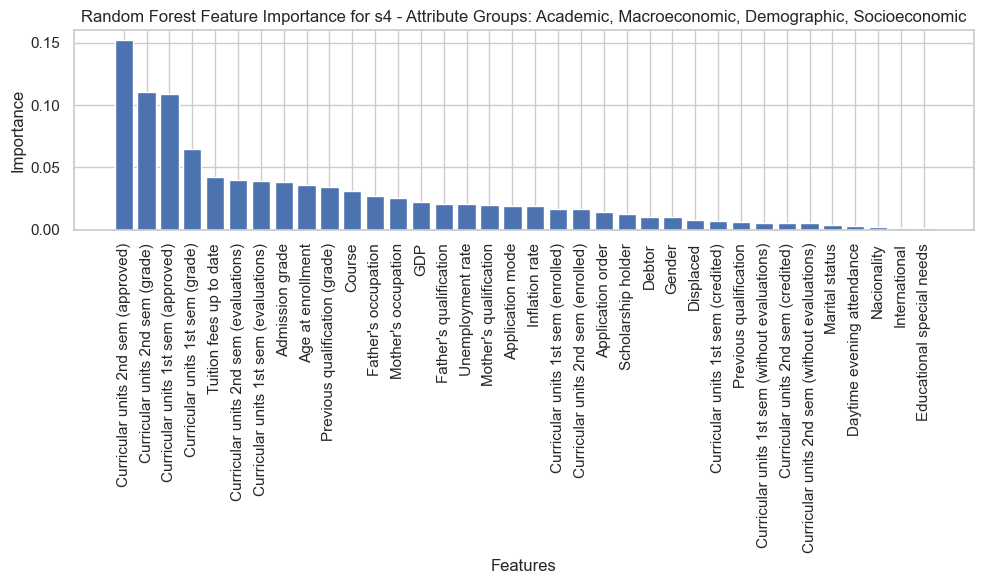

-------------------------------------------------------------

Results for s5 and t5:
Attribute Groups: Demographic, Socioeconomic
Accuracy: 0.5483
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.53      0.58      0.55       266
    Enrolled       0.25      0.13      0.17       174
    Graduate       0.61      0.70      0.65       430

    accuracy                           0.55       870
   macro avg       0.46      0.47      0.46       870
weighted avg       0.51      0.55      0.53       870



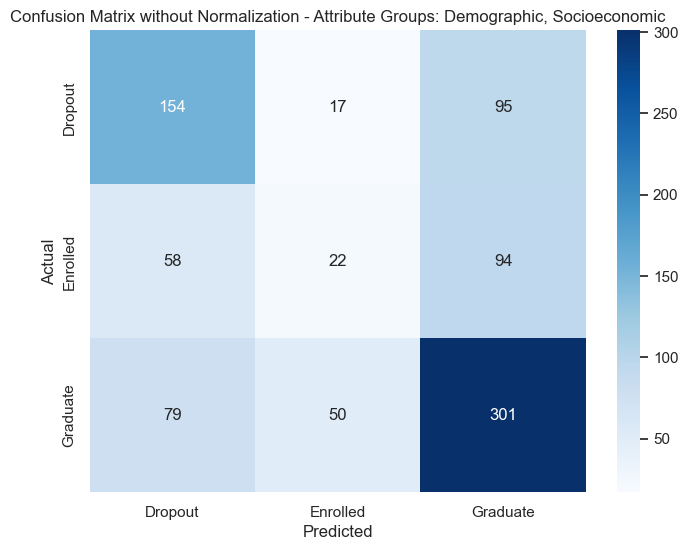

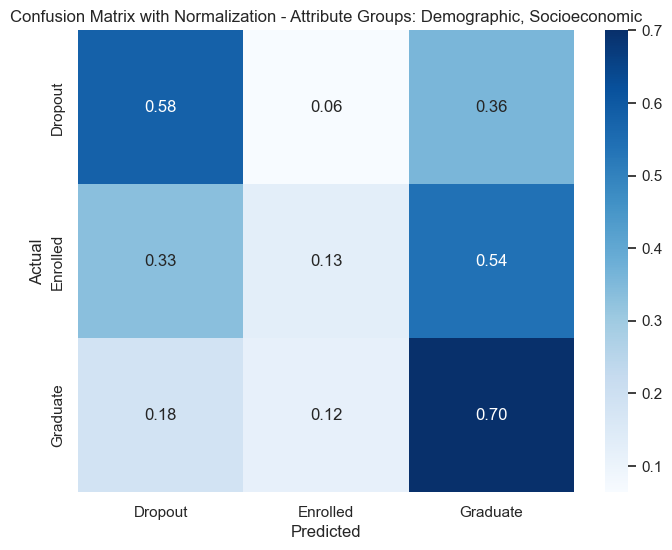

Top five Feature Importance:
                  Feature  Importance
4       Age at enrollment      0.1919
9     Father's occupation      0.1763
8     Mother's occupation      0.1394
7  Father's qualification      0.1098
6  Mother's qualification      0.1080


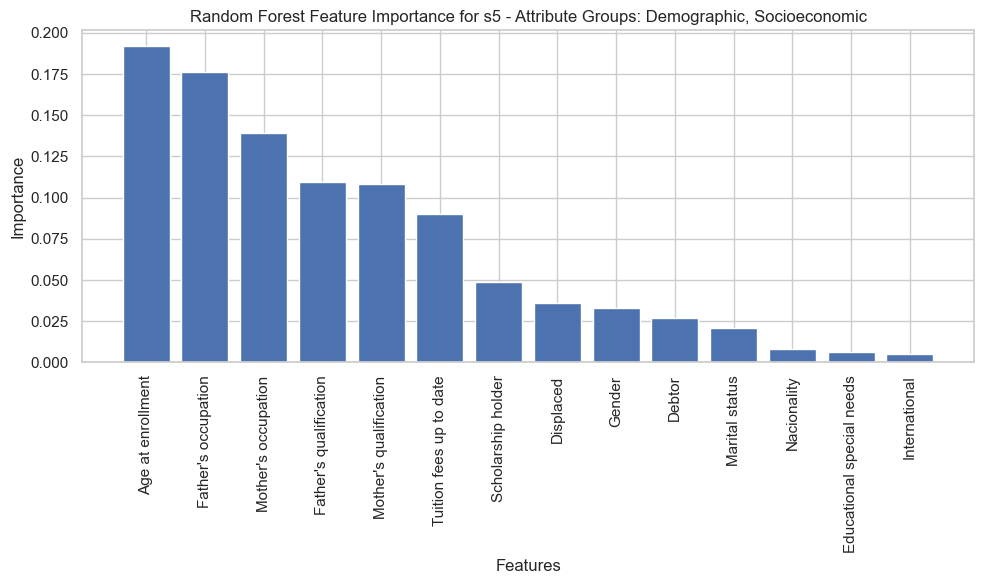

-------------------------------------------------------------

RF Test DataFrame:


,Subset,Attribute Groups,Accuracy,Precision (Dropout),Precision (Enrolled),Precision (Graduate),Recall (Dropout),Recall (Enrolled),Recall (Graduate),F1-Score (Dropout),F1-Score (Enrolled),F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7632,0.7393,0.5169,0.8204,0.7782,0.2644,0.9558,0.7582,0.3498,0.8829
1,s2,"Academic, Macroeconomics, Demographic",0.7517,0.7546,0.4787,0.8008,0.7632,0.2586,0.9442,0.7589,0.3358,0.8666
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7828,0.7754,0.6344,0.8144,0.8045,0.3391,0.9488,0.7897,0.4419,0.8765
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7805,0.7802,0.6237,0.8095,0.8008,0.3333,0.9488,0.7904,0.4345,0.8737
4,s5,"Demographic, Socioeconomic",0.5483,0.5292,0.2472,0.6143,0.5789,0.1264,0.7000,0.5530,0.1673,0.6543


In [170]:


# Define subsets and test sets
subsets = [s1, s2, s3, s4, s5]
test_sets = [t1, t2, t3, t4, t5]

# Attribute groups definition
attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]

# Initialize a list to store results
results_list = []

# Initialize lists to store metrics for each subset
precision_dropout_list = []
precision_enrolled_list = []
precision_graduate_list = []
recall_dropout_list = []
recall_enrolled_list = []
recall_graduate_list = []
f1_dropout_list = []
f1_enrolled_list = []
f1_graduate_list = []

# Initialize lists to store Subset and Attribute Groups
subset_list = []
attribute_groups_list = []
accuracy_list = []

# Iterating over subsets and their corresponding test sets
for i, (train_set, test_set) in enumerate(zip(subsets, test_sets), 1):
    target_train = train_set["Target"]
    features_train = train_set.drop("Target", axis=1)

    target_test = test_set["Target"]
    features_test = test_set.drop("Target", axis=1)

    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=76)
    rf_classifier.fit(features_train, target_train)

    # Make predictions on the test set
    predictions = rf_classifier.predict(features_test)

    # Evaluate the model
    accuracy = accuracy_score(target_test, predictions)
    target_names = ['Dropout', 'Enrolled', 'Graduate']
    report = classification_report(target_test, predictions, target_names=target_names, output_dict=True)

    # Append results to the list
    results_list.append((accuracy, report))

    # Store metrics for each class
    precision_dropout_list.append(report['Dropout']['precision'])
    precision_enrolled_list.append(report['Enrolled']['precision'])
    precision_graduate_list.append(report['Graduate']['precision'])
    recall_dropout_list.append(report['Dropout']['recall'])
    recall_enrolled_list.append(report['Enrolled']['recall'])
    recall_graduate_list.append(report['Graduate']['recall'])
    f1_dropout_list.append(report['Dropout']['f1-score'])
    f1_enrolled_list.append(report['Enrolled']['f1-score'])
    f1_graduate_list.append(report['Graduate']['f1-score'])

    # Store Subset and Attribute Groups
    subset_list.append(f's{i}')
    attribute_groups_list.append(', '.join(attribute_groups[i - 1]))
    accuracy_list.append(accuracy)

    # Print results
    print(f"Results for s{i} and t{i}:")
    print(f"Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(target_test, predictions, target_names=target_names))

    # Confusion Matrix without normalization
    cm = confusion_matrix(target_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix without Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix with normalization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix with Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    feature_importance = rf_classifier.feature_importances_
    feature_names = list(features_train.columns)

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    
    # Print top five feature importance
    print("Top five Feature Importance:")
    print(feature_importance_df.head(5))

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
    plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Random Forest Feature Importance for s{i} - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.tight_layout()
    plt.show()

    print("-------------------------------------------------------------\n")

    

# Create a summary dataframe
RF_test_df = pd.DataFrame({
    'Subset': subset_list,
    'Attribute Groups': attribute_groups_list,
    'Accuracy': accuracy_list,
    'Precision (Dropout)': precision_dropout_list,
    'Precision (Enrolled)': precision_enrolled_list,
    'Precision (Graduate)': precision_graduate_list,
    'Recall (Dropout)': recall_dropout_list,
    'Recall (Enrolled)': recall_enrolled_list,
    'Recall (Graduate)': recall_graduate_list,
    'F1-Score (Dropout)': f1_dropout_list,
    'F1-Score (Enrolled)': f1_enrolled_list,
    'F1-Score (Graduate)': f1_graduate_list
})

# Display the summary dataframe
print("RF Test DataFrame:")

RF_test_df


Results for s1 and t1:
Attribute Groups: Academic, Macroeconomic
Accuracy: 0.7552
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.77      0.74      0.75       266
    Enrolled       0.51      0.32      0.39       174
    Graduate       0.80      0.94      0.87       430

    accuracy                           0.76       870
   macro avg       0.69      0.67      0.67       870
weighted avg       0.73      0.76      0.74       870



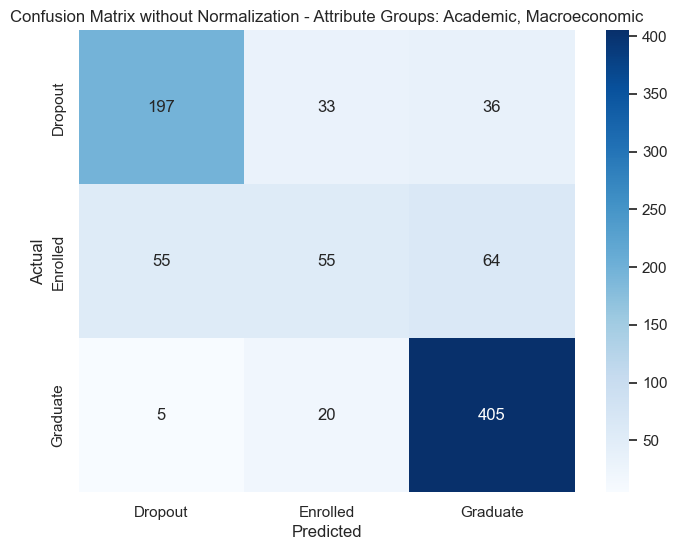

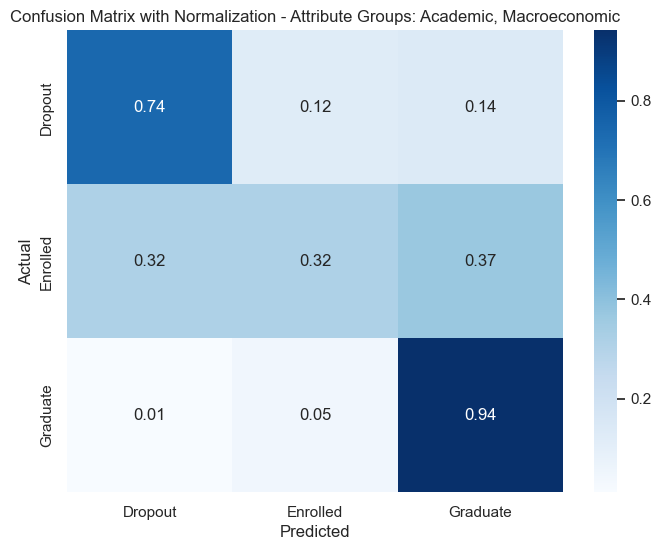

Top five Feature Importance:
                                   Feature  Importance
19     Curricular units 2nd sem (approved)      0.6836
13     Curricular units 1st sem (approved)      0.0492
20        Curricular units 2nd sem (grade)      0.0381
12  Curricular units 1st sem (evaluations)      0.0334
5                                   Course      0.0293


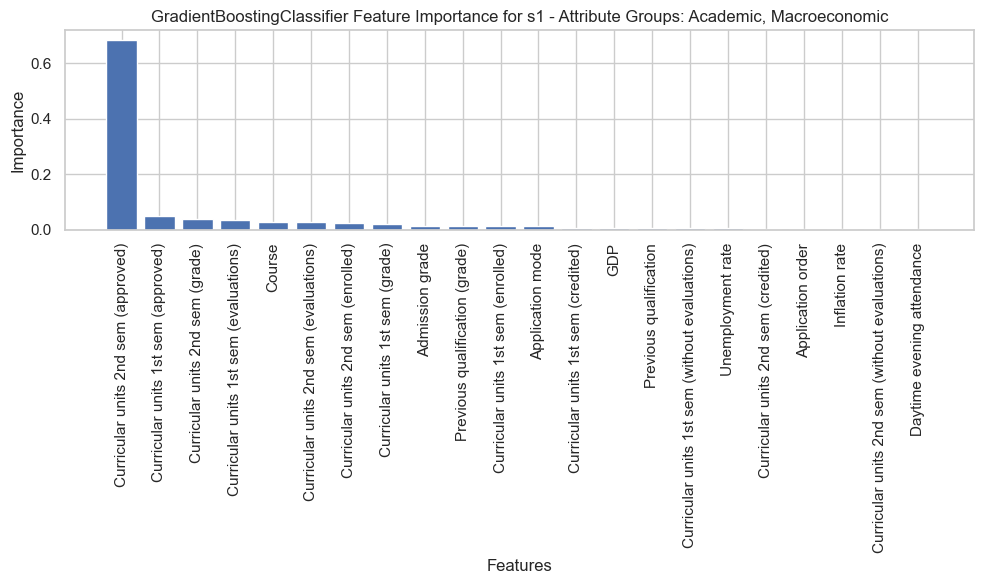

-------------------------------------------------------------

Results for s2 and t2:
Attribute Groups: Academic, Macroeconomics, Demographic
Accuracy: 0.7667
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.76      0.77      0.76       266
    Enrolled       0.56      0.31      0.40       174
    Graduate       0.81      0.95      0.87       430

    accuracy                           0.77       870
   macro avg       0.71      0.68      0.68       870
weighted avg       0.74      0.77      0.75       870



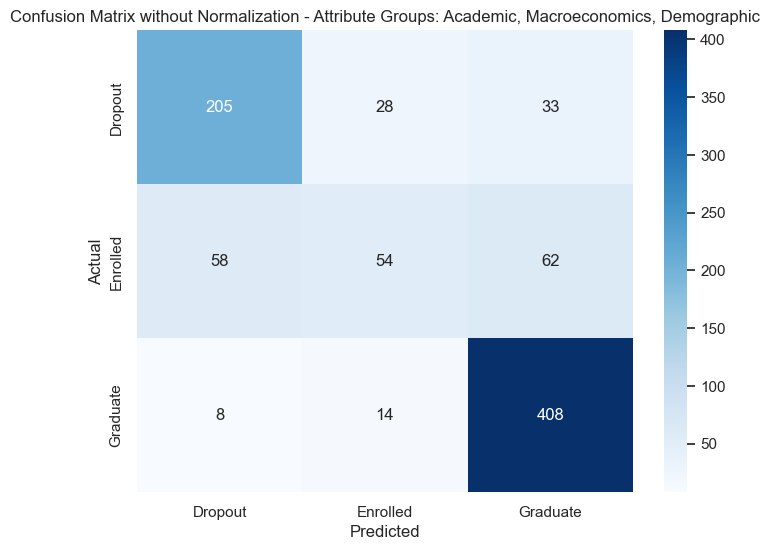

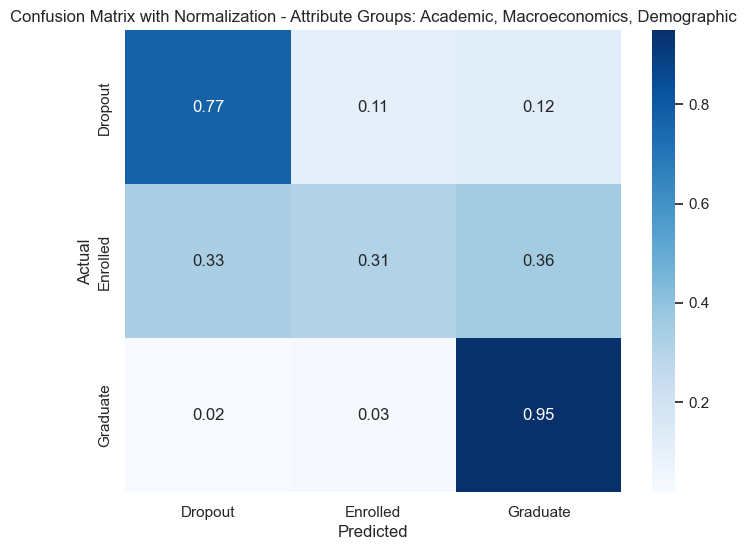

Top five Feature Importance:
                                   Feature  Importance
19     Curricular units 2nd sem (approved)      0.6763
13     Curricular units 1st sem (approved)      0.0521
26                       Age at enrollment      0.0348
20        Curricular units 2nd sem (grade)      0.0341
12  Curricular units 1st sem (evaluations)      0.0295


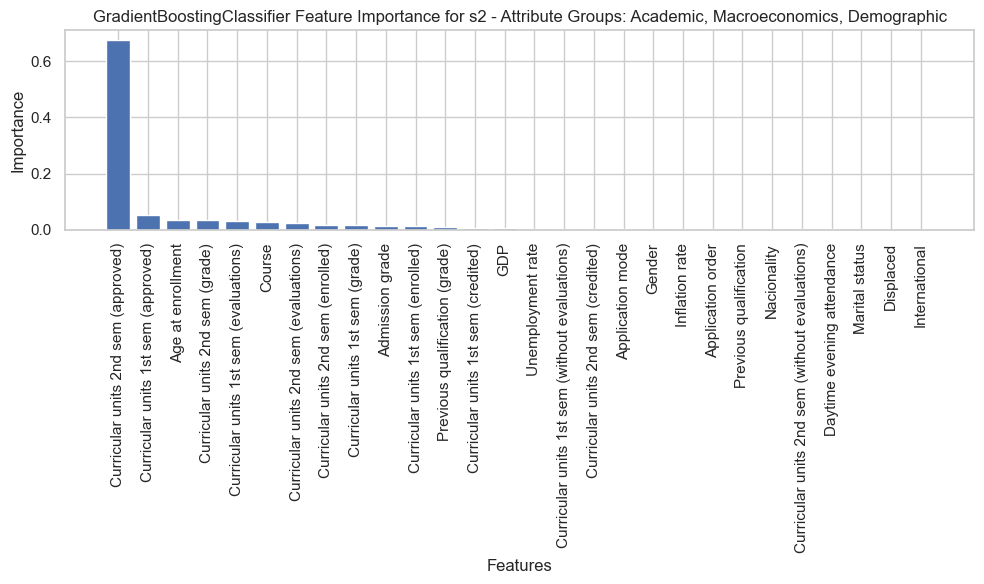

-------------------------------------------------------------

Results for s3 and t3:
Attribute Groups: Academic, Macroeconomics, Socioeconomic
Accuracy: 0.7667
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.77      0.77      0.77       266
    Enrolled       0.53      0.34      0.42       174
    Graduate       0.82      0.93      0.87       430

    accuracy                           0.77       870
   macro avg       0.71      0.68      0.69       870
weighted avg       0.75      0.77      0.75       870



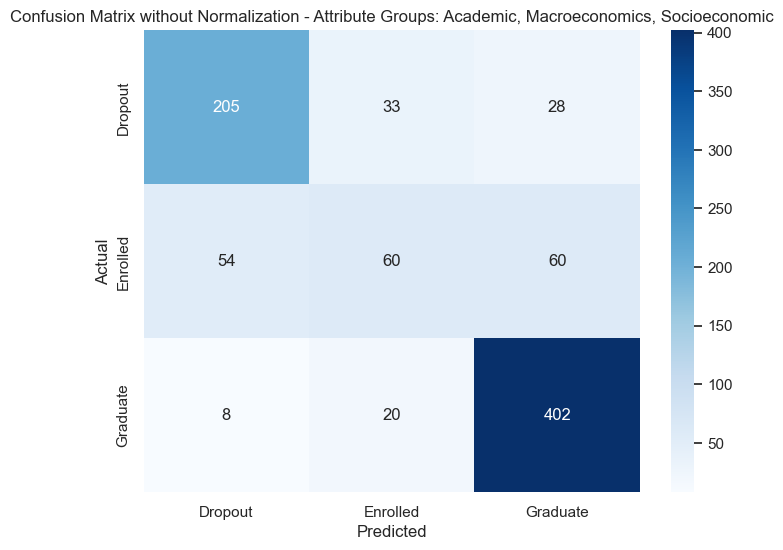

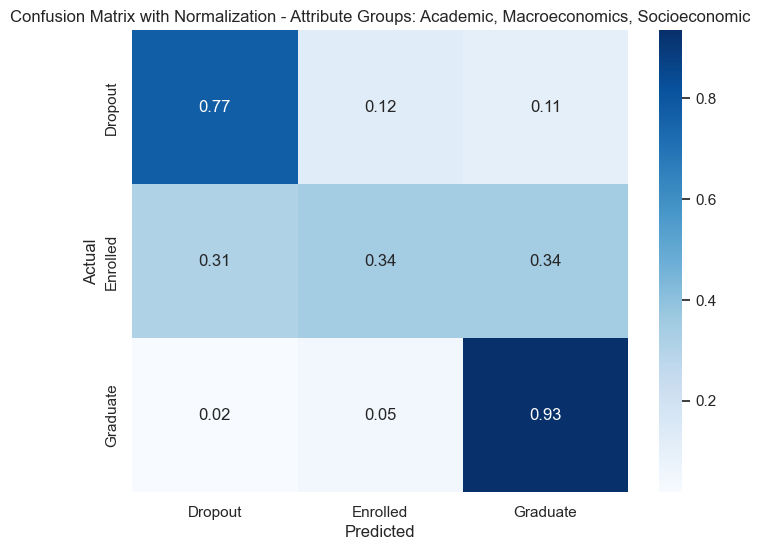

Top five Feature Importance:
                                   Feature  Importance
19     Curricular units 2nd sem (approved)      0.6193
28                 Tuition fees up to date      0.0784
13     Curricular units 1st sem (approved)      0.0438
20        Curricular units 2nd sem (grade)      0.0323
12  Curricular units 1st sem (evaluations)      0.0250


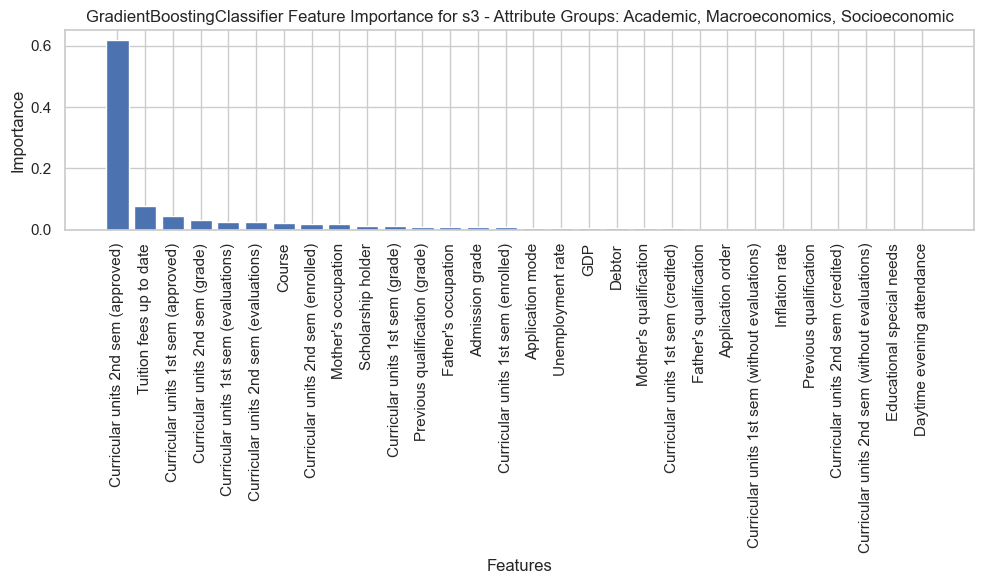

-------------------------------------------------------------

Results for s4 and t4:
Attribute Groups: Academic, Macroeconomic, Demographic, Socioeconomic
Accuracy: 0.7701
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.77      0.77      0.77       266
    Enrolled       0.55      0.35      0.43       174
    Graduate       0.82      0.94      0.88       430

    accuracy                           0.77       870
   macro avg       0.71      0.69      0.69       870
weighted avg       0.75      0.77      0.75       870



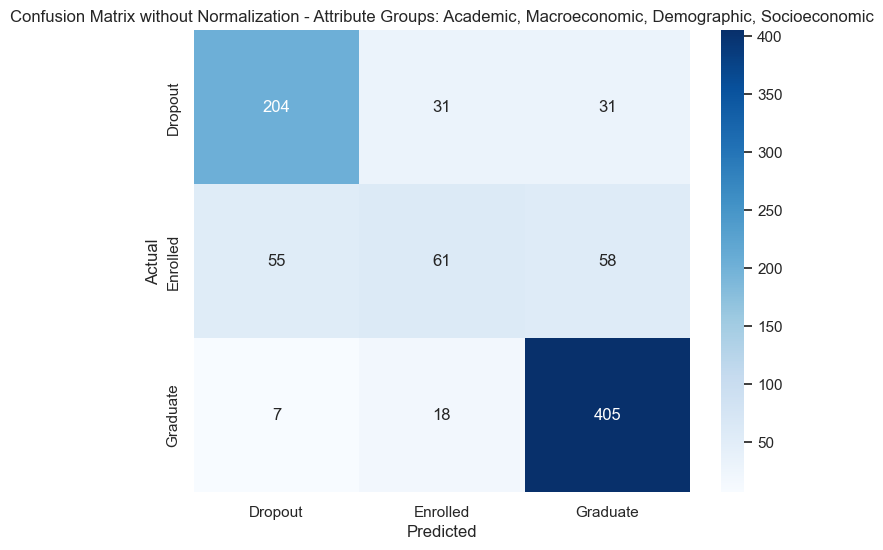

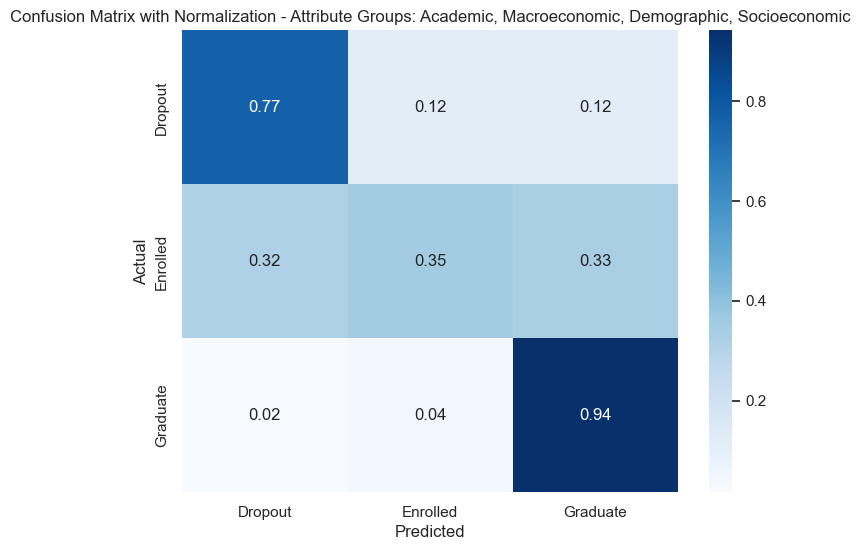

Top five Feature Importance:
                                   Feature  Importance
19     Curricular units 2nd sem (approved)      0.6126
28                 Tuition fees up to date      0.0767
13     Curricular units 1st sem (approved)      0.0431
20        Curricular units 2nd sem (grade)      0.0293
12  Curricular units 1st sem (evaluations)      0.0236


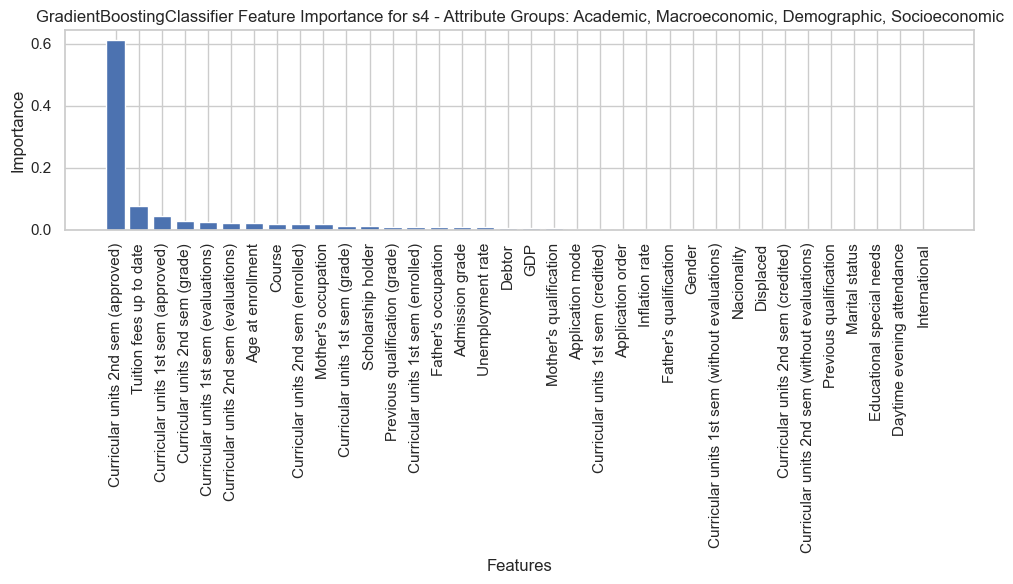

-------------------------------------------------------------

Results for s5 and t5:
Attribute Groups: Demographic, Socioeconomic
Accuracy: 0.6115
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.62      0.57      0.59       266
    Enrolled       0.44      0.04      0.07       174
    Graduate       0.61      0.87      0.72       430

    accuracy                           0.61       870
   macro avg       0.56      0.49      0.46       870
weighted avg       0.58      0.61      0.55       870



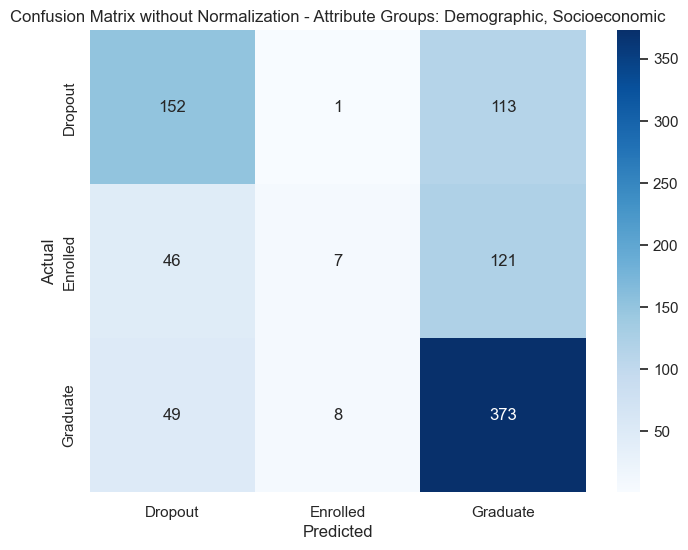

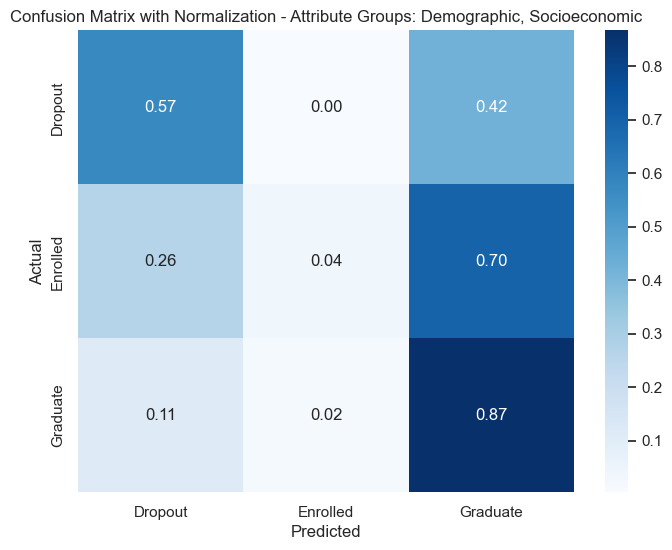

Top five Feature Importance:
                    Feature  Importance
12  Tuition fees up to date      0.3828
13       Scholarship holder      0.1570
4         Age at enrollment      0.1404
8       Mother's occupation      0.0821
3                    Gender      0.0554


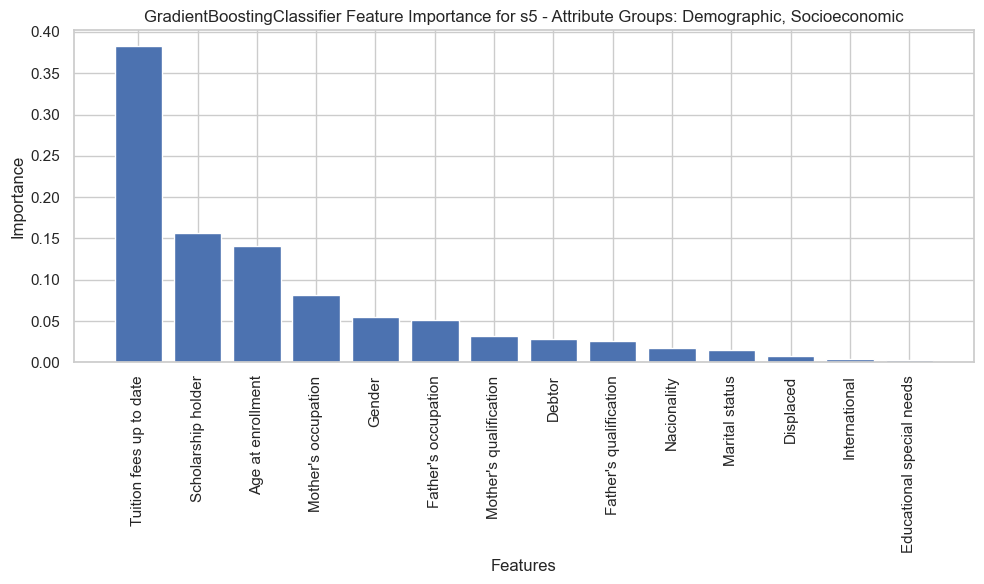

-------------------------------------------------------------

GB Test DataFrame:


,Subset,Attribute Groups,Accuracy,Precision (Dropout),Precision (Enrolled),Precision (Graduate),Recall (Dropout),Recall (Enrolled),Recall (Graduate),F1-Score (Dropout),F1-Score (Enrolled),F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7552,0.7665,0.5093,0.8020,0.7406,0.3161,0.9419,0.7533,0.3901,0.8663
1,s2,"Academic, Macroeconomics, Demographic",0.7667,0.7565,0.5625,0.8111,0.7707,0.3103,0.9488,0.7635,0.4000,0.8746
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7667,0.7678,0.5310,0.8204,0.7707,0.3448,0.9349,0.7692,0.4181,0.8739
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7701,0.7669,0.5545,0.8198,0.7669,0.3506,0.9419,0.7669,0.4296,0.8766
4,s5,"Demographic, Socioeconomic",0.6115,0.6154,0.4375,0.6145,0.5714,0.0402,0.8674,0.5926,0.0737,0.7194


In [171]:


# FOR Gardient 



# Define your subsets and test sets
subsets = [s1, s2, s3, s4, s5]
test_sets = [t1, t2, t3, t4, t5]

# Attribute groups definition
attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]

# Initialize a list to store results
results_list = []

# Initialize lists to store metrics for each subset
precision_dropout_list = []
precision_enrolled_list = []
precision_graduate_list = []
recall_dropout_list = []
recall_enrolled_list = []
recall_graduate_list = []
f1_dropout_list = []
f1_enrolled_list = []
f1_graduate_list = []

# Initialize lists to store Subset and Attribute Groups
subset_list = []
attribute_groups_list = []
accuracy_list = []

# Iterating over subsets and their corresponding test sets
for i, (train_set, test_set) in enumerate(zip(subsets, test_sets), 1):
    target_train = train_set["Target"]
    features_train = train_set.drop("Target", axis=1)

    target_test = test_set["Target"]
    features_test = test_set.drop("Target", axis=1)

    # Gradient Boosting Classifier
    GB_classifier = GradientBoostingClassifier( random_state=76)
    GB_classifier.fit(features_train, target_train)

    # Make predictions on the test set
    predictions = GB_classifier.predict(features_test)

    # Evaluate the model
    accuracy = accuracy_score(target_test, predictions)
    target_names = ['Dropout', 'Enrolled', 'Graduate']
    report = classification_report(target_test, predictions, target_names=target_names, output_dict=True)

    # Append results to the list
    results_list.append((accuracy, report))

    # Store metrics for each class
    precision_dropout_list.append(report['Dropout']['precision'])
    precision_enrolled_list.append(report['Enrolled']['precision'])
    precision_graduate_list.append(report['Graduate']['precision'])
    recall_dropout_list.append(report['Dropout']['recall'])
    recall_enrolled_list.append(report['Enrolled']['recall'])
    recall_graduate_list.append(report['Graduate']['recall'])
    f1_dropout_list.append(report['Dropout']['f1-score'])
    f1_enrolled_list.append(report['Enrolled']['f1-score'])
    f1_graduate_list.append(report['Graduate']['f1-score'])

    # Store Subset and Attribute Groups
    subset_list.append(f's{i}')
    attribute_groups_list.append(', '.join(attribute_groups[i - 1]))
    accuracy_list.append(accuracy)

    # Print results
    print(f"Results for s{i} and t{i}:")
    print(f"Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(target_test, predictions, target_names=target_names))

    # Confusion Matrix without normalization
    cm = confusion_matrix(target_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix without Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix with normalization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix with Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    feature_importance = GB_classifier.feature_importances_
    feature_names = list(features_train.columns)

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    

    # Print top five feature importance
    print("Top five Feature Importance:")
    print(feature_importance_df.head(5))

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
    plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'GradientBoostingClassifier Feature Importance for s{i} - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.tight_layout()
    plt.show()

    print("-------------------------------------------------------------\n")

# Create a summary dataframe
GB_test_df = pd.DataFrame({
    'Subset': subset_list,
    'Attribute Groups': attribute_groups_list,
    'Accuracy': accuracy_list,
    'Precision (Dropout)': precision_dropout_list,
    'Precision (Enrolled)': precision_enrolled_list,
    'Precision (Graduate)': precision_graduate_list,
    'Recall (Dropout)': recall_dropout_list,
    'Recall (Enrolled)': recall_enrolled_list,
    'Recall (Graduate)': recall_graduate_list,
    'F1-Score (Dropout)': f1_dropout_list,
    'F1-Score (Enrolled)': f1_enrolled_list,
    'F1-Score (Graduate)': f1_graduate_list
})

# Display the summary dataframe
print("GB Test DataFrame:")

GB_test_df

Results for s1 and t1:
Attribute Groups: Academic, Macroeconomic
Accuracy: 0.7471
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.71      0.75      0.73       266
    Enrolled       0.50      0.32      0.39       174
    Graduate       0.83      0.92      0.87       430

    accuracy                           0.75       870
   macro avg       0.68      0.66      0.66       870
weighted avg       0.73      0.75      0.73       870



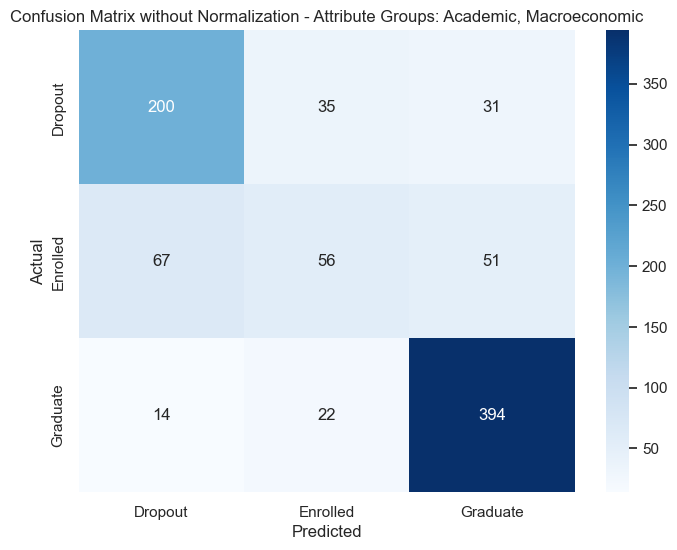

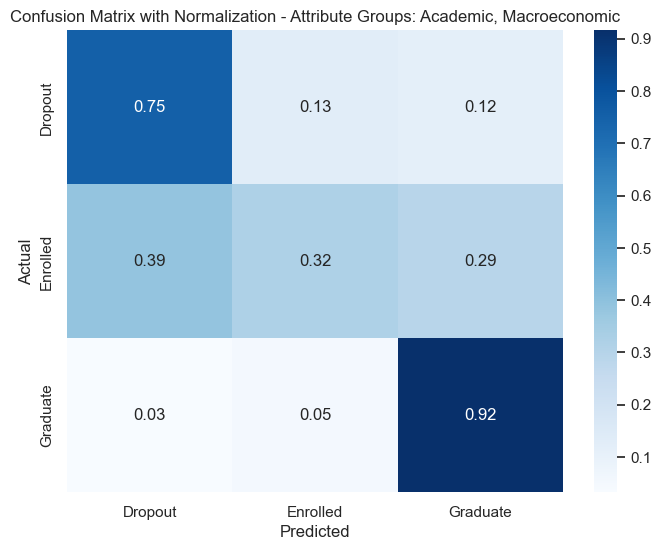

Top five Feature Importance:
                                Feature  Importance
19  Curricular units 2nd sem (approved)      0.3501
17  Curricular units 2nd sem (enrolled)      0.0644
13  Curricular units 1st sem (approved)      0.0463
11  Curricular units 1st sem (enrolled)      0.0394
16  Curricular units 2nd sem (credited)      0.0359


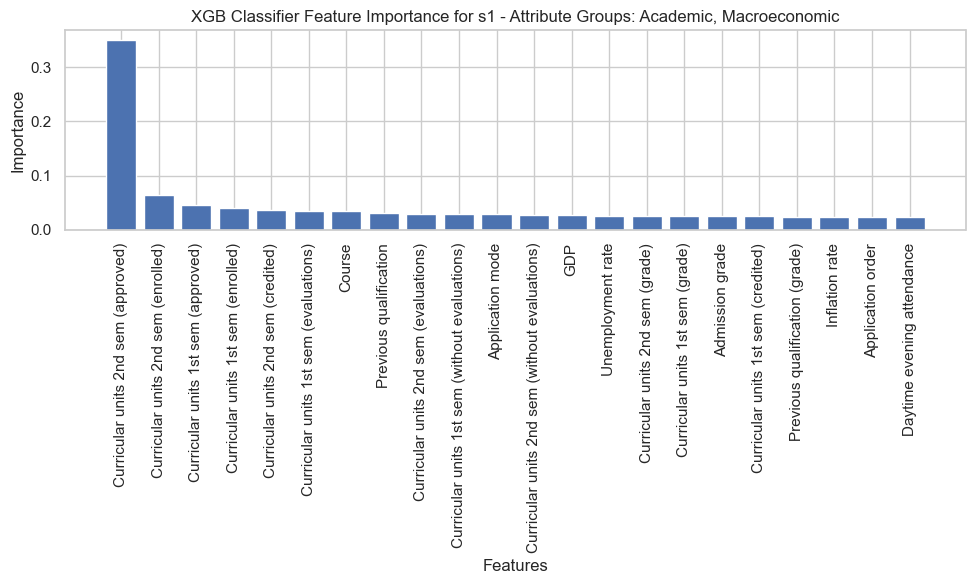

-------------------------------------------------------------

Results for s2 and t2:
Attribute Groups: Academic, Macroeconomics, Demographic
Accuracy: 0.7540
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.72      0.77      0.74       266
    Enrolled       0.55      0.33      0.41       174
    Graduate       0.82      0.92      0.86       430

    accuracy                           0.75       870
   macro avg       0.70      0.67      0.67       870
weighted avg       0.73      0.75      0.74       870



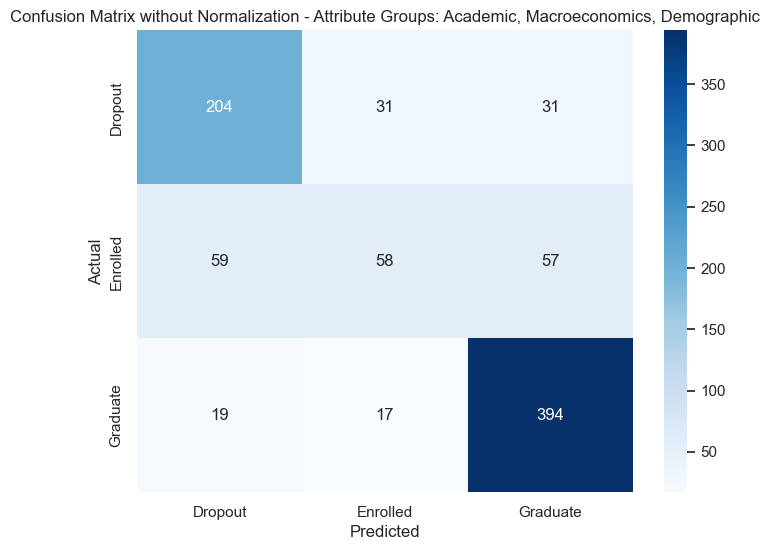

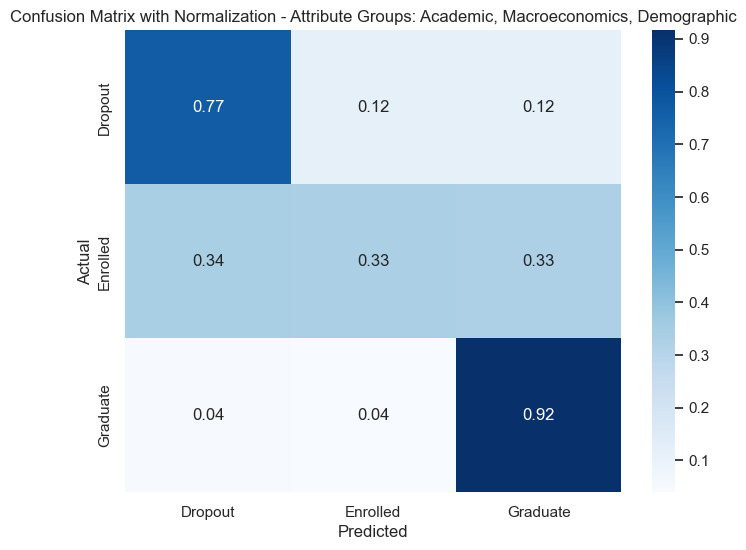

Top five Feature Importance:
                                           Feature  Importance
19             Curricular units 2nd sem (approved)      0.3150
17             Curricular units 2nd sem (enrolled)      0.0580
13             Curricular units 1st sem (approved)      0.0414
11             Curricular units 1st sem (enrolled)      0.0361
15  Curricular units 1st sem (without evaluations)      0.0309


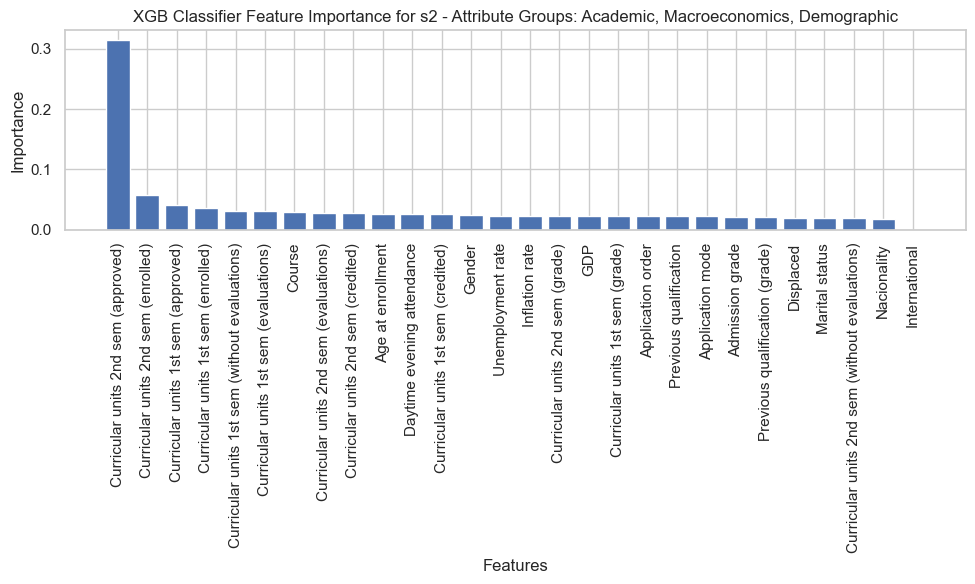

-------------------------------------------------------------

Results for s3 and t3:
Attribute Groups: Academic, Macroeconomics, Socioeconomic
Accuracy: 0.7736
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.78      0.79      0.79       266
    Enrolled       0.56      0.40      0.46       174
    Graduate       0.83      0.91      0.87       430

    accuracy                           0.77       870
   macro avg       0.72      0.70      0.71       870
weighted avg       0.76      0.77      0.76       870



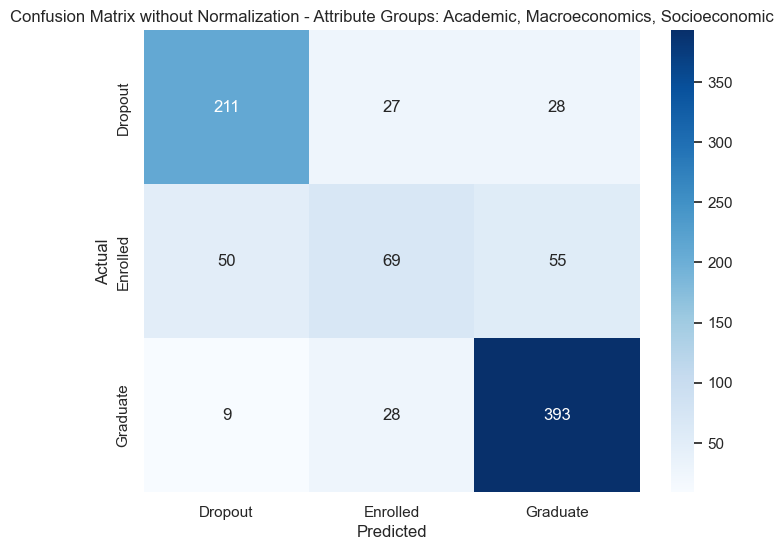

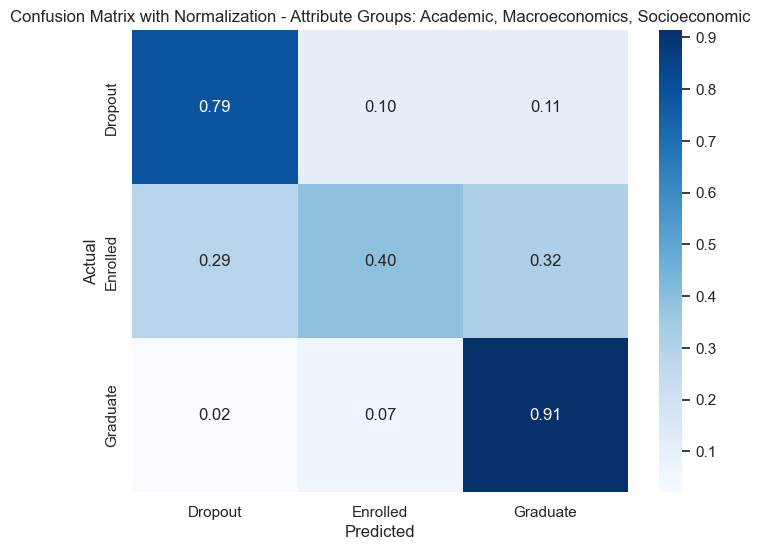

Top five Feature Importance:
                                Feature  Importance
19  Curricular units 2nd sem (approved)      0.2643
28              Tuition fees up to date      0.1464
17  Curricular units 2nd sem (enrolled)      0.0399
13  Curricular units 1st sem (approved)      0.0352
29                   Scholarship holder      0.0334


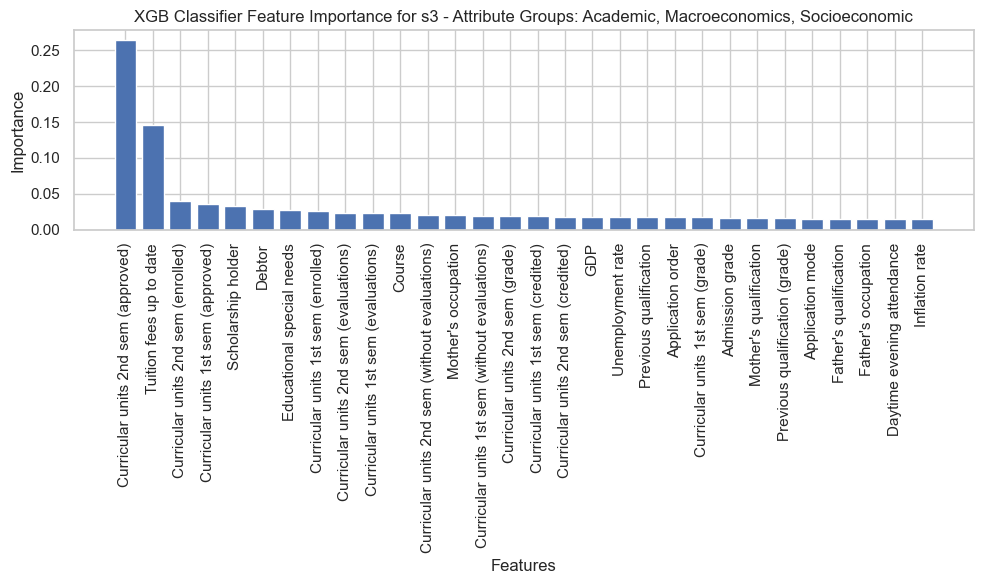

-------------------------------------------------------------

Results for s4 and t4:
Attribute Groups: Academic, Macroeconomic, Demographic, Socioeconomic
Accuracy: 0.7989
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.81      0.80       266
    Enrolled       0.65      0.45      0.54       174
    Graduate       0.84      0.93      0.88       430

    accuracy                           0.80       870
   macro avg       0.76      0.73      0.74       870
weighted avg       0.79      0.80      0.79       870



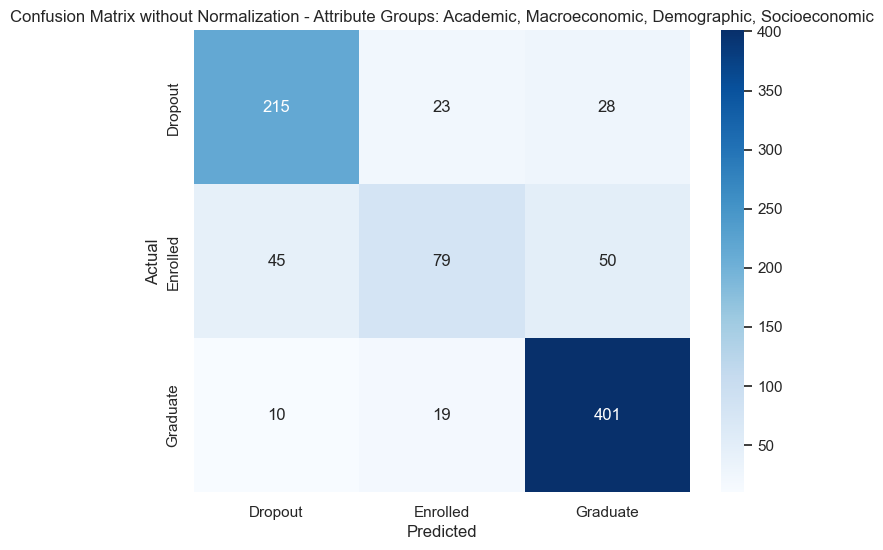

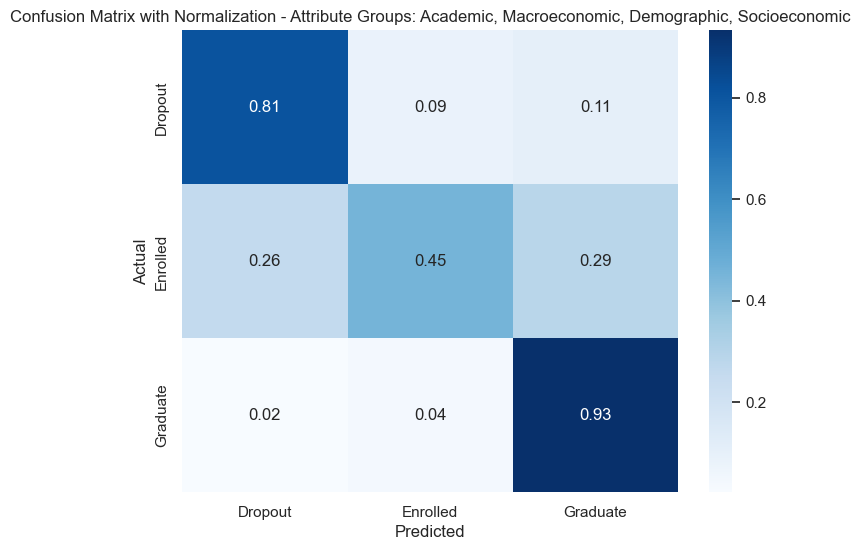

Top five Feature Importance:
                                Feature  Importance
19  Curricular units 2nd sem (approved)      0.2480
28              Tuition fees up to date      0.1270
17  Curricular units 2nd sem (enrolled)      0.0364
29                   Scholarship holder      0.0351
13  Curricular units 1st sem (approved)      0.0336


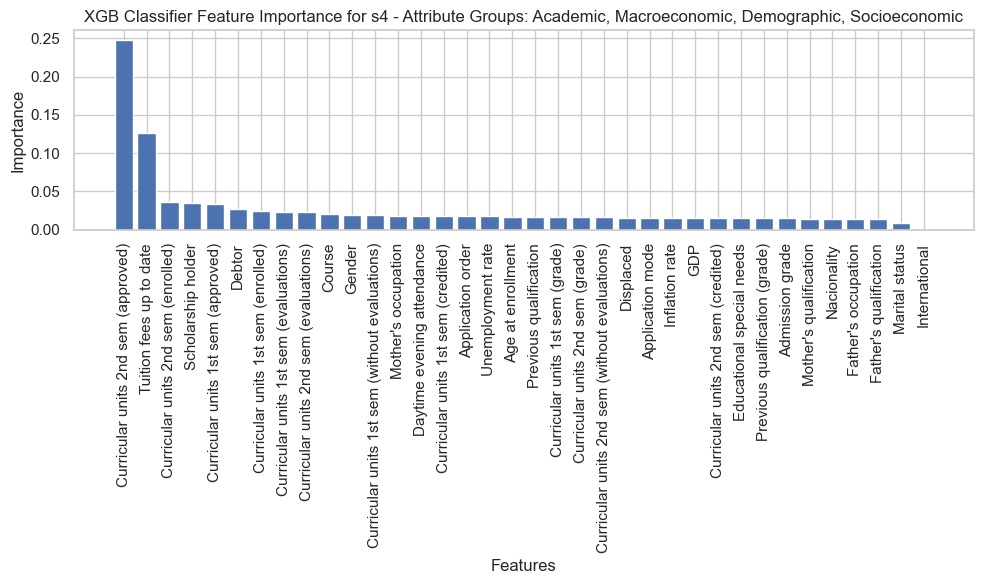

-------------------------------------------------------------

Results for s5 and t5:
Attribute Groups: Demographic, Socioeconomic
Accuracy: 0.5724
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.55      0.54      0.55       266
    Enrolled       0.31      0.13      0.18       174
    Graduate       0.62      0.77      0.69       430

    accuracy                           0.57       870
   macro avg       0.49      0.48      0.47       870
weighted avg       0.54      0.57      0.54       870



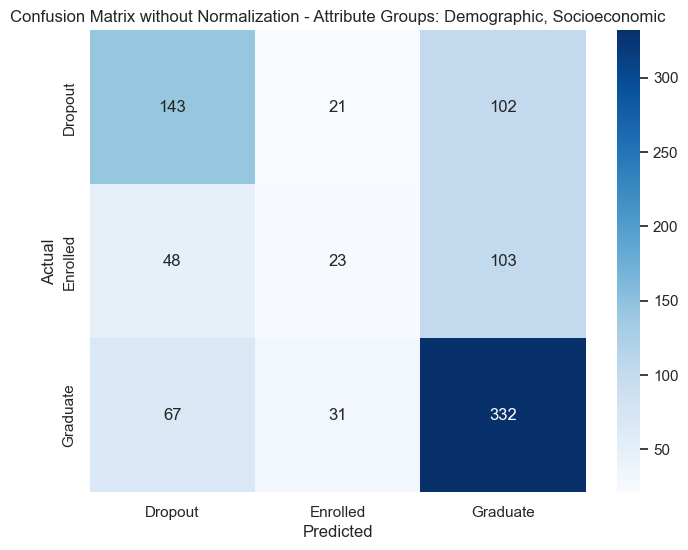

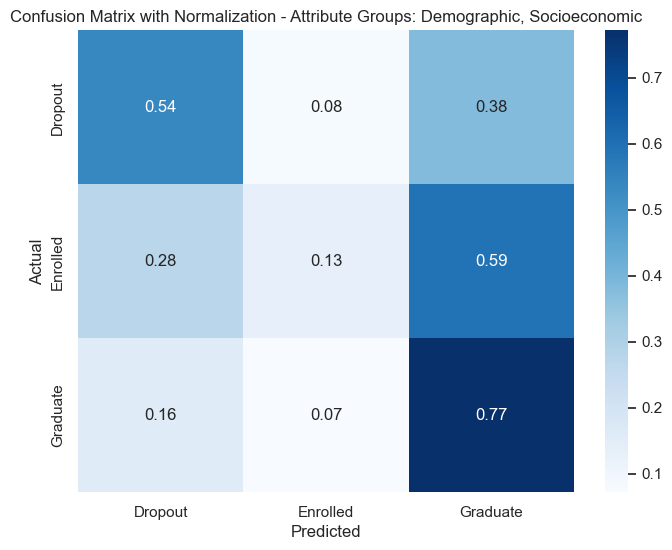

Top five Feature Importance:
                    Feature  Importance
12  Tuition fees up to date      0.5750
13       Scholarship holder      0.1291
3                    Gender      0.0358
11                   Debtor      0.0339
8       Mother's occupation      0.0313


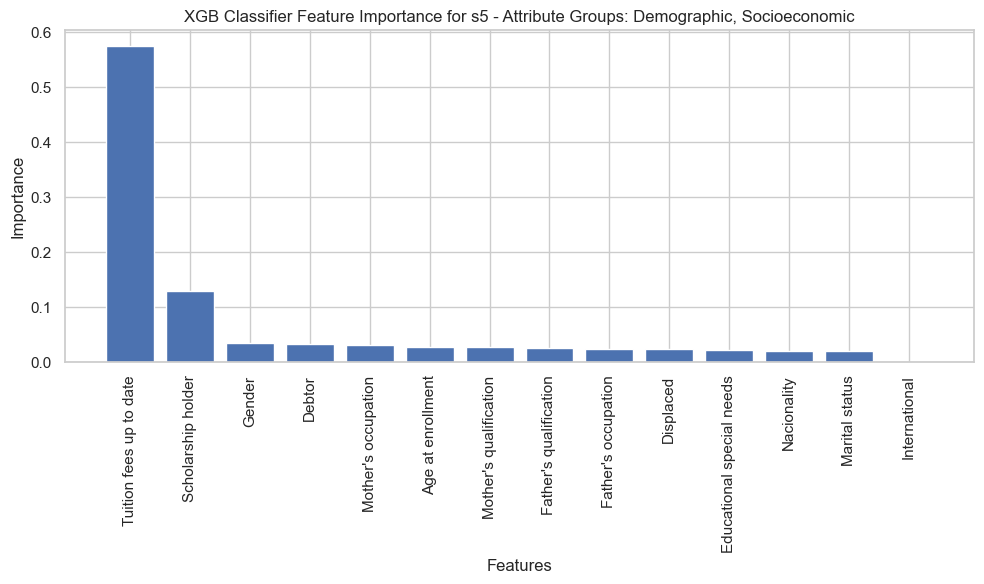

-------------------------------------------------------------

XGB Test DataFrame:


,Subset,Attribute Groups,Accuracy,Precision (Dropout),Precision (Enrolled),Precision (Graduate),Recall (Dropout),Recall (Enrolled),Recall (Graduate),F1-Score (Dropout),F1-Score (Enrolled),F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7471,0.7117,0.4956,0.8277,0.7519,0.3218,0.9163,0.7313,0.3902,0.8698
1,s2,"Academic, Macroeconomics, Demographic",0.7540,0.7234,0.5472,0.8174,0.7669,0.3333,0.9163,0.7445,0.4143,0.8640
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7736,0.7815,0.5565,0.8256,0.7932,0.3966,0.9140,0.7873,0.4631,0.8675
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7989,0.7963,0.6529,0.8372,0.8083,0.4540,0.9326,0.8022,0.5356,0.8823
4,s5,"Demographic, Socioeconomic",0.5724,0.5543,0.3067,0.6182,0.5376,0.1322,0.7721,0.5458,0.1847,0.6867


In [172]:


# FOR XGB classifier



# Define your subsets and test sets
subsets = [s1, s2, s3, s4, s5]
test_sets = [t1, t2, t3, t4, t5]

# Attribute groups definition
attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]

# Initialize a list to store results
results_list = []

# Initialize lists to store metrics for each subset
precision_dropout_list = []
precision_enrolled_list = []
precision_graduate_list = []
recall_dropout_list = []
recall_enrolled_list = []
recall_graduate_list = []
f1_dropout_list = []
f1_enrolled_list = []
f1_graduate_list = []

# Initialize lists to store Subset and Attribute Groups
subset_list = []
attribute_groups_list = []
accuracy_list = []

# Iterating over subsets and their corresponding test sets
for i, (train_set, test_set) in enumerate(zip(subsets, test_sets), 1):
    target_train = train_set["Target"]
    features_train = train_set.drop("Target", axis=1)

    target_test = test_set["Target"]
    features_test = test_set.drop("Target", axis=1)

    # XGBClassifier
    xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3, random_state=76)
    xgb_classifier.fit(features_train, target_train)

    # Make predictions on the test set
    predictions = xgb_classifier.predict(features_test)

    # Evaluate the model
    accuracy = accuracy_score(target_test, predictions)
    target_names = ['Dropout', 'Enrolled', 'Graduate']
    report = classification_report(target_test, predictions, target_names=target_names, output_dict=True)

    # Append results to the list
    results_list.append((accuracy, report))

    # Store metrics for each class
    precision_dropout_list.append(report['Dropout']['precision'])
    precision_enrolled_list.append(report['Enrolled']['precision'])
    precision_graduate_list.append(report['Graduate']['precision'])
    recall_dropout_list.append(report['Dropout']['recall'])
    recall_enrolled_list.append(report['Enrolled']['recall'])
    recall_graduate_list.append(report['Graduate']['recall'])
    f1_dropout_list.append(report['Dropout']['f1-score'])
    f1_enrolled_list.append(report['Enrolled']['f1-score'])
    f1_graduate_list.append(report['Graduate']['f1-score'])

    # Store Subset and Attribute Groups
    subset_list.append(f's{i}')
    attribute_groups_list.append(', '.join(attribute_groups[i - 1]))
    accuracy_list.append(accuracy)

    # Print results
    print(f"Results for s{i} and t{i}:")
    print(f"Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(target_test, predictions, target_names=target_names))

    # Confusion Matrix without normalization
    cm = confusion_matrix(target_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix without Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix with normalization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix with Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    feature_importance = xgb_classifier.feature_importances_
    feature_names = list(features_train.columns)

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    

    # Print top five feature importance
    print("Top five Feature Importance:")
    print(feature_importance_df.head(5))

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
    plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'XGB Classifier Feature Importance for s{i} - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.tight_layout()
    plt.show()

    print("-------------------------------------------------------------\n")

# Create a summary dataframe
XGB_test_df = pd.DataFrame({
    'Subset': subset_list,
    'Attribute Groups': attribute_groups_list,
    'Accuracy': accuracy_list,
    'Precision (Dropout)': precision_dropout_list,
    'Precision (Enrolled)': precision_enrolled_list,
    'Precision (Graduate)': precision_graduate_list,
    'Recall (Dropout)': recall_dropout_list,
    'Recall (Enrolled)': recall_enrolled_list,
    'Recall (Graduate)': recall_graduate_list,
    'F1-Score (Dropout)': f1_dropout_list,
    'F1-Score (Enrolled)': f1_enrolled_list,
    'F1-Score (Graduate)': f1_graduate_list
})

# Display the summary dataframe
print("XGB Test DataFrame:")
XGB_test_df



# Part 4: Final Results Summary and Graphs
## Final results start here
<a id="final_results"></a>
Random Forest Classifier

1. Train Validaiton Set results
2. Test Set results

Gradient Boosting Classifier

1. Train Validaiton Set results
2. Test Set results

XGB Classifier

1. Train Validaiton Set results
2. Test Set results




# Final Results

## Random Forest

### Training Validation Set

In [173]:
RF_train_validate_df

,Subset,Attribute Groups,Average Accuracy,SD Accuracy,Average Precision (Dropout),SD Precision (Dropout),Average Precision (Enrolled),SD Precision (Enrolled),Average Precision (Graduate),SD Precision (Graduate),Average Recall (Dropout),SD Recall (Dropout),Average Recall (Enrolled),SD Recall (Enrolled),Average Recall (Graduate),SD Recall (Graduate),Average F1-Score (Dropout),SD F1-Score (Dropout),Average F1-Score (Enrolled),SD F1-Score (Enrolled),Average F1-Score (Graduate),SD F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7525,0.0155,0.8001,0.0311,0.4757,0.0693,0.7783,0.0148,0.7394,0.0317,0.2806,0.0506,0.9331,0.0151,0.7682,0.0275,0.3515,0.0533,0.8485,0.0073
1,s2,"Academic, Macroeconomics, Demographic",0.7571,0.0183,0.7931,0.0410,0.4942,0.0547,0.7830,0.0194,0.7497,0.0344,0.2758,0.0486,0.9372,0.0141,0.7705,0.0340,0.3529,0.0517,0.8530,0.0118
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7833,0.0121,0.8389,0.0222,0.5639,0.0501,0.7953,0.0228,0.7871,0.0319,0.3323,0.0560,0.9449,0.0209,0.8118,0.0219,0.4147,0.0459,0.8631,0.0091
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7767,0.0151,0.8315,0.0268,0.5544,0.0838,0.7890,0.0234,0.7758,0.0314,0.3161,0.0555,0.9449,0.0178,0.8023,0.0247,0.3993,0.0553,0.8595,0.0104
4,s5,"Demographic, Socioeconomic",0.5824,0.0222,0.5999,0.0381,0.2676,0.0790,0.6224,0.0249,0.5940,0.0443,0.1435,0.0556,0.7341,0.0329,0.5964,0.0370,0.1857,0.0670,0.6736,0.0274


### Test Set Results

In [174]:
RF_test_df

,Subset,Attribute Groups,Accuracy,Precision (Dropout),Precision (Enrolled),Precision (Graduate),Recall (Dropout),Recall (Enrolled),Recall (Graduate),F1-Score (Dropout),F1-Score (Enrolled),F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7632,0.7393,0.5169,0.8204,0.7782,0.2644,0.9558,0.7582,0.3498,0.8829
1,s2,"Academic, Macroeconomics, Demographic",0.7517,0.7546,0.4787,0.8008,0.7632,0.2586,0.9442,0.7589,0.3358,0.8666
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7828,0.7754,0.6344,0.8144,0.8045,0.3391,0.9488,0.7897,0.4419,0.8765
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7805,0.7802,0.6237,0.8095,0.8008,0.3333,0.9488,0.7904,0.4345,0.8737
4,s5,"Demographic, Socioeconomic",0.5483,0.5292,0.2472,0.6143,0.5789,0.1264,0.7000,0.5530,0.1673,0.6543


## Gradien Descent 

### Train Validation Set

In [175]:
GB_train_validate_df

,Subset,Attribute Groups,Average Accuracy,SD Accuracy,Average Precision (Dropout),SD Precision (Dropout),Average Precision (Enrolled),SD Precision (Enrolled),Average Precision (Graduate),SD Precision (Graduate),Average Recall (Dropout),SD Recall (Dropout),Average Recall (Enrolled),SD Recall (Enrolled),Average Recall (Graduate),SD Recall (Graduate),Average F1-Score (Dropout),SD F1-Score (Dropout),Average F1-Score (Enrolled),SD F1-Score (Enrolled),Average F1-Score (Graduate),SD F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7600,0.0184,0.8035,0.0313,0.4971,0.0518,0.7866,0.0189,0.7454,0.0309,0.2968,0.0409,0.9384,0.0191,0.7731,0.0285,0.3696,0.0368,0.8556,0.0126
1,s2,"Academic, Macroeconomics, Demographic",0.7562,0.0161,0.8012,0.0301,0.4827,0.0545,0.7846,0.0205,0.7385,0.0301,0.2919,0.0447,0.9372,0.0181,0.7684,0.0274,0.3620,0.0422,0.8539,0.0126
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7813,0.0181,0.8397,0.0292,0.5487,0.0523,0.7993,0.0285,0.7714,0.0355,0.3629,0.0704,0.9402,0.0178,0.8036,0.0263,0.4338,0.0614,0.8636,0.0165
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7813,0.0172,0.8394,0.0234,0.5450,0.0564,0.8011,0.0279,0.7714,0.0259,0.3661,0.0645,0.9390,0.0163,0.8037,0.0202,0.4355,0.0588,0.8642,0.0160
4,s5,"Demographic, Socioeconomic",0.6183,0.0196,0.6578,0.0435,0.4325,0.1240,0.6078,0.0124,0.5793,0.0350,0.0532,0.0192,0.8503,0.0257,0.6156,0.0353,0.0943,0.0328,0.7088,0.0161


### Test Set Results

In [176]:
GB_test_df

,Subset,Attribute Groups,Accuracy,Precision (Dropout),Precision (Enrolled),Precision (Graduate),Recall (Dropout),Recall (Enrolled),Recall (Graduate),F1-Score (Dropout),F1-Score (Enrolled),F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7552,0.7665,0.5093,0.8020,0.7406,0.3161,0.9419,0.7533,0.3901,0.8663
1,s2,"Academic, Macroeconomics, Demographic",0.7667,0.7565,0.5625,0.8111,0.7707,0.3103,0.9488,0.7635,0.4000,0.8746
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7667,0.7678,0.5310,0.8204,0.7707,0.3448,0.9349,0.7692,0.4181,0.8739
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7701,0.7669,0.5545,0.8198,0.7669,0.3506,0.9419,0.7669,0.4296,0.8766
4,s5,"Demographic, Socioeconomic",0.6115,0.6154,0.4375,0.6145,0.5714,0.0402,0.8674,0.5926,0.0737,0.7194


## XGBoost Clasifier

### Train Validation Results

In [177]:
XGB_train_validate_df

,Subset,Attribute Groups,Average Accuracy,SD Accuracy,Average Precision (Dropout),SD Precision (Dropout),Average Precision (Enrolled),SD Precision (Enrolled),Average Precision (Graduate),SD Precision (Graduate),Average Recall (Dropout),SD Recall (Dropout),Average Recall (Enrolled),SD Recall (Enrolled),Average Recall (Graduate),SD Recall (Graduate),Average F1-Score (Dropout),SD F1-Score (Dropout),Average F1-Score (Enrolled),SD F1-Score (Enrolled),Average F1-Score (Graduate),SD F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7413,0.0158,0.7717,0.0310,0.4250,0.0591,0.7937,0.0214,0.7264,0.0289,0.2968,0.0726,0.9132,0.0144,0.7481,0.0255,0.3475,0.0681,0.8490,0.0122
1,s2,"Academic, Macroeconomics, Demographic",0.7496,0.0153,0.7780,0.0306,0.4621,0.0598,0.7987,0.0193,0.7299,0.0360,0.3210,0.0481,0.9190,0.0144,0.7528,0.0294,0.3773,0.0469,0.8544,0.0106
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7761,0.0204,0.8331,0.0291,0.5234,0.0802,0.8056,0.0232,0.7715,0.0352,0.3806,0.0707,0.9232,0.0247,0.8007,0.0280,0.4376,0.0694,0.8599,0.0118
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7810,0.0155,0.8300,0.0275,0.5329,0.0549,0.8145,0.0244,0.7784,0.0304,0.3919,0.0510,0.9243,0.0192,0.8029,0.0225,0.4494,0.0430,0.8655,0.0113
4,s5,"Demographic, Socioeconomic",0.5979,0.0252,0.6254,0.0276,0.3091,0.0557,0.6219,0.0255,0.5681,0.0588,0.1387,0.0290,0.7852,0.0345,0.5946,0.0435,0.1904,0.0356,0.6939,0.0277


### Test Results

In [178]:
XGB_test_df

,Subset,Attribute Groups,Accuracy,Precision (Dropout),Precision (Enrolled),Precision (Graduate),Recall (Dropout),Recall (Enrolled),Recall (Graduate),F1-Score (Dropout),F1-Score (Enrolled),F1-Score (Graduate)
0,s1,"Academic, Macroeconomic",0.7471,0.7117,0.4956,0.8277,0.7519,0.3218,0.9163,0.7313,0.3902,0.8698
1,s2,"Academic, Macroeconomics, Demographic",0.7540,0.7234,0.5472,0.8174,0.7669,0.3333,0.9163,0.7445,0.4143,0.8640
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7736,0.7815,0.5565,0.8256,0.7932,0.3966,0.9140,0.7873,0.4631,0.8675
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7989,0.7963,0.6529,0.8372,0.8083,0.4540,0.9326,0.8022,0.5356,0.8823
4,s5,"Demographic, Socioeconomic",0.5724,0.5543,0.3067,0.6182,0.5376,0.1322,0.7721,0.5458,0.1847,0.6867


Graphs (for test_results only)



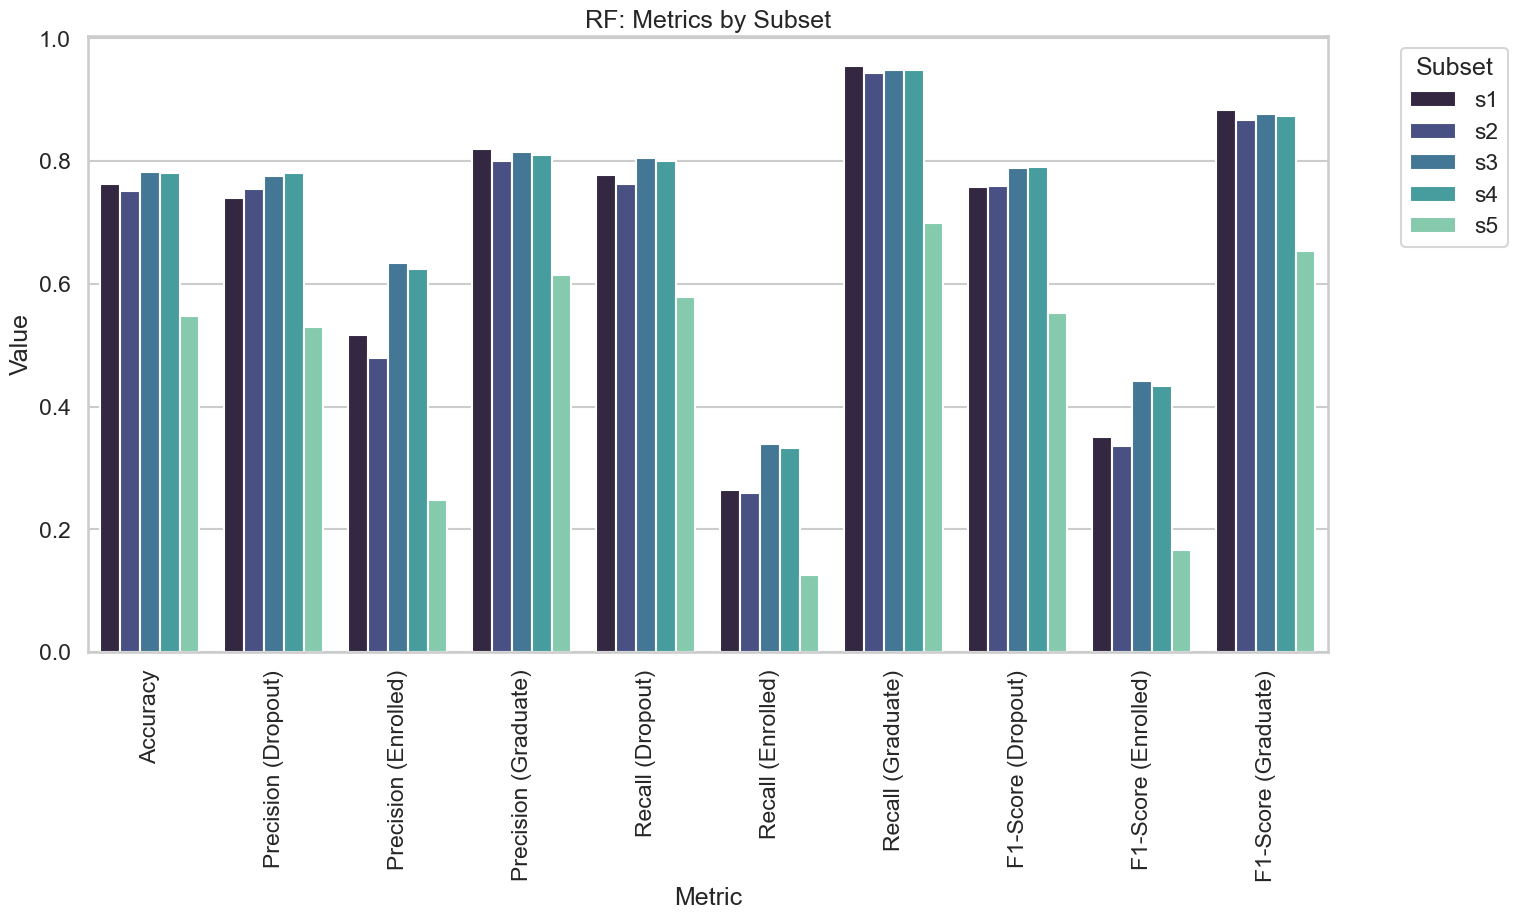

In [179]:


# Copying the Random Forest Test dataframe to build graphs.

data = {
'Subset': ['s1', 's2', 's3', 's4', 's5'],

 'Accuracy': [0.7632183908045977,
  0.7517241379310344,
  0.7827586206896552,
  0.7804597701149425,
  0.5482758620689655],
 'Precision (Dropout)': [0.7392857142857143,
  0.7546468401486989,
  0.7753623188405797,
  0.7802197802197802,
  0.5292096219931272],
 'Precision (Enrolled)': [0.5168539325842697,
  0.4787234042553192,
  0.6344086021505376,
  0.6236559139784946,
  0.24719101123595505],
 'Precision (Graduate)': [0.8203592814371258,
  0.8007889546351085,
  0.8143712574850299,
  0.8095238095238095,
  0.6142857142857143],
 'Recall (Dropout)': [0.7781954887218046,
  0.7631578947368421,
  0.8045112781954887,
  0.8007518796992481,
  0.5789473684210527],
 'Recall (Enrolled)': [0.26436781609195403,
  0.25862068965517243,
  0.3390804597701149,
  0.3333333333333333,
  0.12643678160919541],
 'Recall (Graduate)': [0.9558139534883721,
  0.9441860465116279,
  0.9488372093023256,
  0.9488372093023256,
  0.7],
 'F1-Score (Dropout)': [0.7582417582417582,
  0.7588785046728972,
  0.7896678966789668,
  0.7903525046382189,
  0.5529622980251347],
 'F1-Score (Enrolled)': [0.34980988593155893,
  0.3358208955223881,
  0.44194756554307113,
  0.43445692883895126,
  0.1673003802281369],
 'F1-Score (Graduate)': [0.8829215896885071,
  0.8665955176093917,
  0.8764769065520945,
  0.873661670235546,
  0.6543478260869565]
}


df = pd.DataFrame(data)

# Set the context for seaborn
sns.set_context("talk")

# Melt the DataFrame to make it suitable for a grouped bar plot
melted_df = pd.melt(df, id_vars=['Subset'], var_name='Metric', value_name='Value')

# Sort the DataFrame to group subsets together
subset_order = df['Subset'].unique()

# Create a grouped bar plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Metric', y='Value', hue='Subset', data=melted_df, palette="mako", hue_order=subset_order)
plt.title('RF: Metrics by Subset')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Subset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()




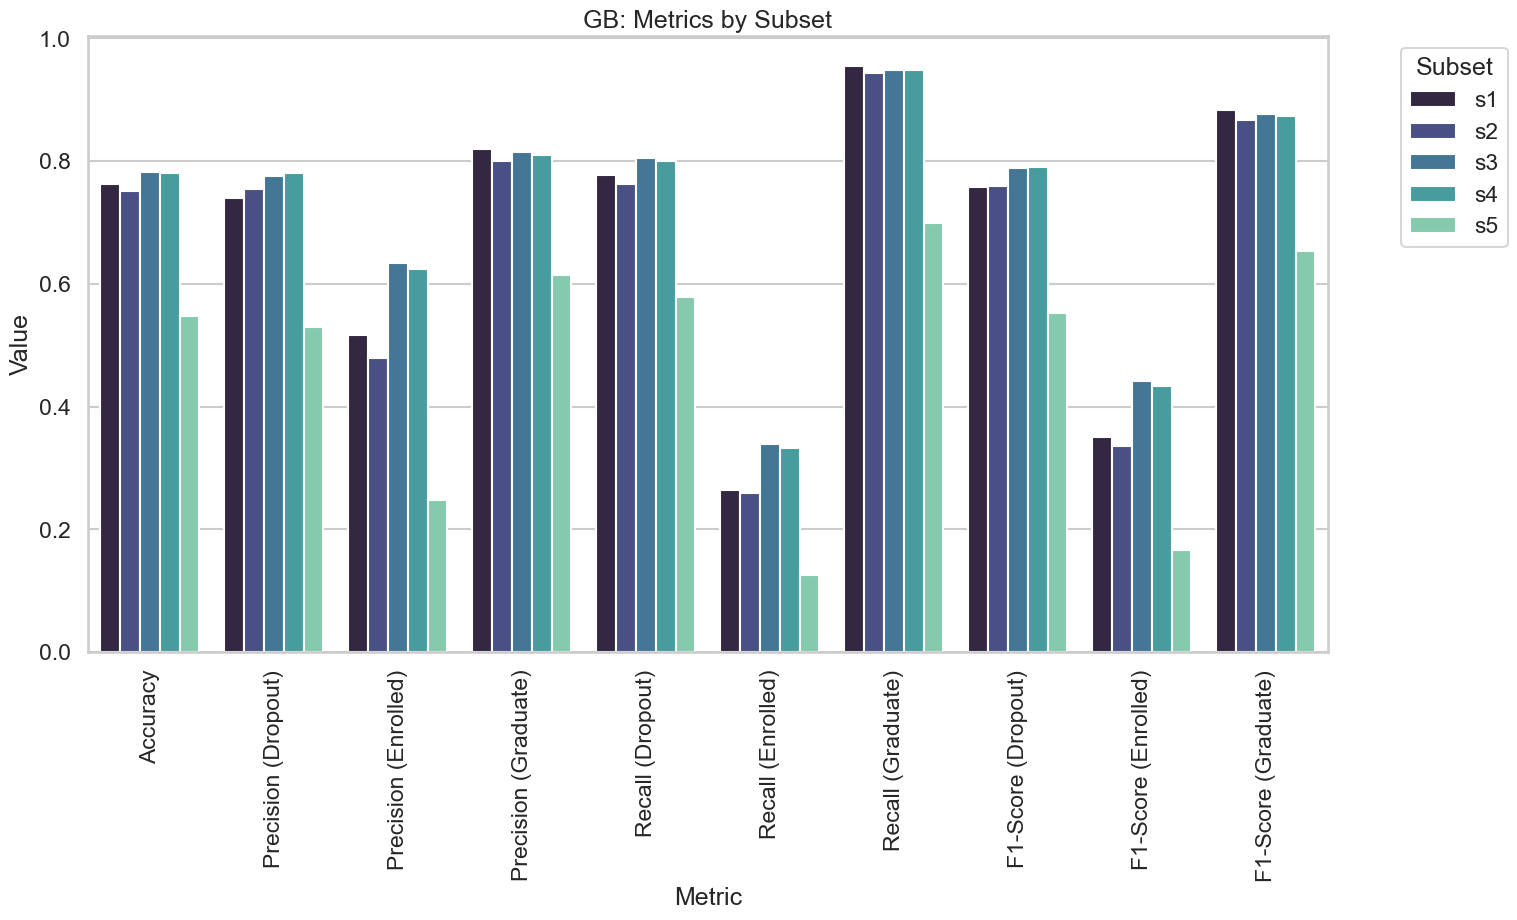

In [180]:

# Copying the Gradient Descent Test dataframe to build graphs.



data
{
    'Subset': ['s1', 's2', 's3', 's4', 's5'],
 
 'Accuracy': [0.7551724137931034,
  0.7666666666666667,
  0.7666666666666667,
  0.7701149425287356,
  0.6114942528735632],
 'Precision (Dropout)': [0.7665369649805448,
  0.7564575645756457,
  0.7677902621722846,
  0.7669172932330827,
  0.6153846153846154],
 'Precision (Enrolled)': [0.5092592592592593,
  0.5625,
  0.5309734513274337,
  0.5545454545454546,
  0.4375],
 'Precision (Graduate)': [0.801980198019802,
  0.8111332007952287,
  0.8204081632653061,
  0.819838056680162,
  0.6144975288303131],
 'Recall (Dropout)': [0.7406015037593985,
  0.7706766917293233,
  0.7706766917293233,
  0.7669172932330827,
  0.5714285714285714],
 'Recall (Enrolled)': [0.3160919540229885,
  0.3103448275862069,
  0.3448275862068966,
  0.3505747126436782,
  0.040229885057471264],
 'Recall (Graduate)': [0.9418604651162791,
  0.9488372093023256,
  0.9348837209302325,
  0.9418604651162791,
  0.8674418604651163],
 'F1-Score (Dropout)': [0.7533460803059274,
  0.7635009310986963,
  0.7692307692307692,
  0.7669172932330828,
  0.5925925925925927],
 'F1-Score (Enrolled)': [0.3900709219858156,
  0.4,
  0.4181184668989547,
  0.42957746478873243,
  0.07368421052631578],
 'F1-Score (Graduate)': [0.8663101604278075,
  0.87459807073955,
  0.8739130434782608,
  0.8766233766233765,
  0.7193828351012537]
  }




df = pd.DataFrame(data)

# Set the context for seaborn
sns.set_context("talk")

# Melt the DataFrame to make it suitable for a grouped bar plot
melted_df = pd.melt(df, id_vars=['Subset'], var_name='Metric', value_name='Value')

# Sort the DataFrame to group subsets together
subset_order = df['Subset'].unique()

# Create a grouped bar plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Metric', y='Value', hue='Subset', data=melted_df, palette="mako", hue_order=subset_order)
plt.title('GB: Metrics by Subset')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Subset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


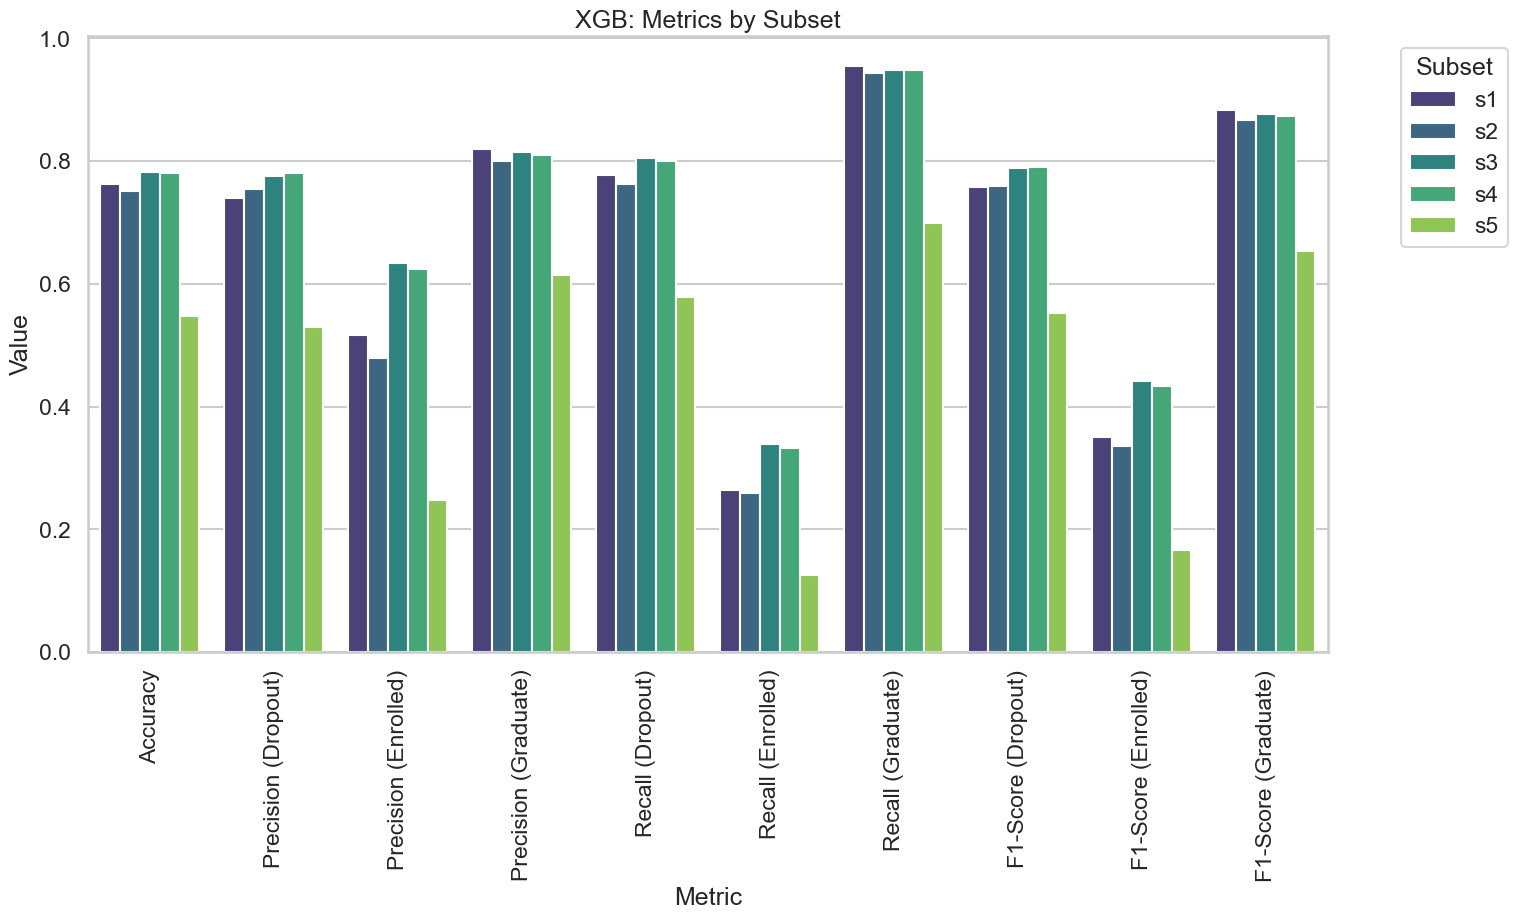

In [181]:

# Copying the XGBooster  Test dataframe to build graphs.

# Assuming 'df' is your DataFrame

data
{
    'Subset': ['s1', 's2', 's3', 's4', 's5'],
 
 'Accuracy': [0.7471264367816092,
  0.7540229885057471,
  0.7735632183908046,
  0.7988505747126436,
  0.5724137931034483],
 'Precision (Dropout)': [0.7117437722419929,
  0.723404255319149,
  0.7814814814814814,
  0.7962962962962963,
  0.5542635658914729],
 'Precision (Enrolled)': [0.49557522123893805,
  0.5471698113207547,
  0.5564516129032258,
  0.6528925619834711,
  0.30666666666666664],
 'Precision (Graduate)': [0.8277310924369747,
  0.8174273858921162,
  0.8256302521008403,
  0.837160751565762,
  0.6182495344506518],
 'Recall (Dropout)': [0.7518796992481203,
  0.7669172932330827,
  0.793233082706767,
  0.8082706766917294,
  0.5375939849624061],
 'Recall (Enrolled)': [0.3218390804597701,
  0.3333333333333333,
  0.39655172413793105,
  0.4540229885057471,
  0.13218390804597702],
 'Recall (Graduate)': [0.9162790697674419,
  0.9162790697674419,
  0.913953488372093,
  0.9325581395348838,
  0.772093023255814],
 'F1-Score (Dropout)': [0.7312614259597806,
  0.7445255474452555,
  0.7873134328358209,
  0.8022388059701493,
  0.5458015267175572],
 'F1-Score (Enrolled)': [0.3902439024390244,
  0.41428571428571426,
  0.4630872483221476,
  0.535593220338983,
  0.18473895582329317],
 'F1-Score (Graduate)': [0.869757174392936,
  0.8640350877192982,
  0.8675496688741721,
  0.8822882288228823,
  0.686659772492244]}








df = pd.DataFrame(data)

# Set the context for seaborn
sns.set_context("talk")

# Melt the DataFrame to make it suitable for a grouped bar plot
melted_df = pd.melt(df, id_vars=['Subset'], var_name='Metric', value_name='Value')

# Sort the DataFrame to group subsets together
subset_order = df['Subset'].unique()

# Create a grouped bar plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Metric', y='Value', hue='Subset', data=melted_df, palette="viridis", hue_order=subset_order)
plt.title('XGB: Metrics by Subset')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Subset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


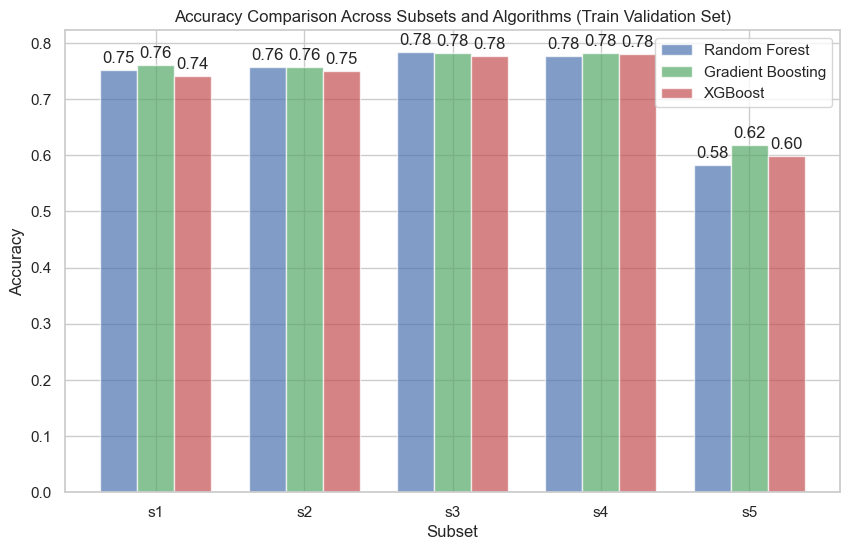

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data are the accuracy of the train validate set results
data = {
    'Subset': ['s1', 's2', 's3', 's4', 's5'],

    'Ave Accuracy RF': [0.7525141607870417,
                        0.757111861936467,
                        0.7832679121534334,
                        0.7766554042863294,
                        0.5823569843320414],

    'Ave Accuracy GB': [0.7599879095034615,
                        0.7562489648547485,
                        0.7812547616681573,
                        0.7812580741329624,
                        0.6182773526781278],

    'Ave Accuracy XGB': [0.7413031236543112,
                         0.7496405975686508,
                         0.7760881446884627,
                         0.7809682334625195,
                         0.5978791944085595],
}

# Convert the data to a pandas DataFrame for easy plotting
df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Define the width of each bar
bar_width = 0.25

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
subset_indices = np.arange(len(df['Subset']))
bars_rf = ax.bar(subset_indices - bar_width, df['Ave Accuracy RF'], width=bar_width, label='Random Forest', color='b', alpha=0.7)
bars_gb = ax.bar(subset_indices, df['Ave Accuracy GB'], width=bar_width, label='Gradient Boosting', color='g', alpha=0.7)
bars_xgb = ax.bar(subset_indices + bar_width, df['Ave Accuracy XGB'], width=bar_width, label='XGBoost', color='r', alpha=0.7)

# Add labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_rf)
add_labels(bars_gb)
add_labels(bars_xgb)

# Set x-axis ticks and labels
ax.set_xticks(subset_indices)
ax.set_xticklabels(df['Subset'])

# Add labels and title
ax.set_xlabel('Subset')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Across Subsets and Algorithms (Train Validation Set)')
ax.legend()

# Show the plot
plt.show()


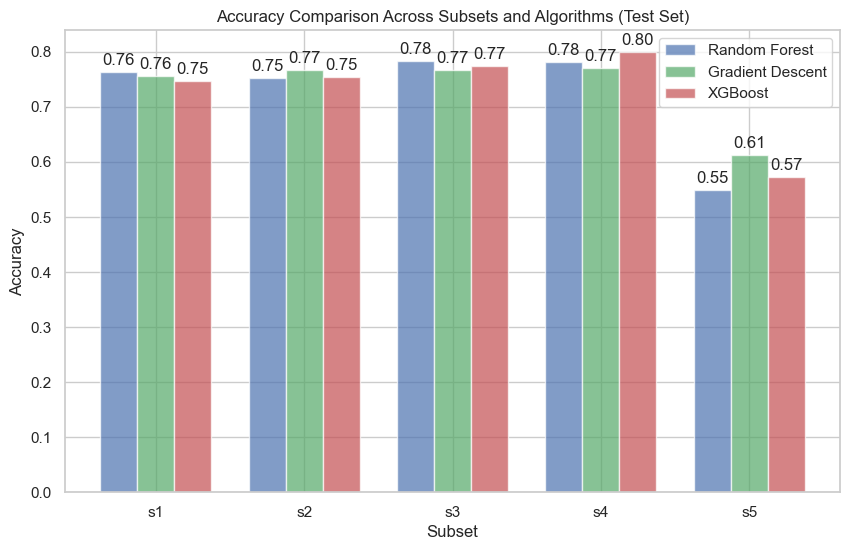

In [183]:
# data are the accuary of the test set results

data = {
'Subset': ['s1', 's2', 's3', 's4', 's5'],

 'Accuracy RF': [0.7632183908045977,
  0.7517241379310344,
  0.7827586206896552,
  0.7804597701149425,
  0.5482758620689655],

  'Accuracy GD': [0.7551724137931034,
  0.7666666666666667,
  0.7666666666666667,
  0.7701149425287356,
  0.6114942528735632],

   'Accuracy XGB': [0.7471264367816092,
  0.7540229885057471,
  0.7735632183908046,
  0.7988505747126436,
  0.5724137931034483],
}

# Convert the data to a pandas DataFrame for easy plotting
df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Define the width of each bar
bar_width = 0.25

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
subset_indices = np.arange(len(df['Subset']))
bars_rf = ax.bar(subset_indices - bar_width, df['Accuracy RF'], width=bar_width, label='Random Forest', color='b', alpha=0.7)
bars_gd = ax.bar(subset_indices, df['Accuracy GD'], width=bar_width, label='Gradient Descent', color='g', alpha=0.7)
bars_xgb = ax.bar(subset_indices + bar_width, df['Accuracy XGB'], width=bar_width, label='XGBoost', color='r', alpha=0.7)

# Add labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_rf)
add_labels(bars_gd)
add_labels(bars_xgb)

# Set x-axis ticks and labels
ax.set_xticks(subset_indices)
ax.set_xticklabels(df['Subset'])

# Add labels and title
ax.set_xlabel('Subset')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Across Subsets and Algorithms (Test Set)')
ax.legend()

# Show the plot
plt.show()


In [186]:
# data are the accuracy of the train validate set and test set
data = {
    'Subset': ['s1', 's2', 's3', 's4', 's5'],

    'Attribute_groups': [
    'Academic, Macroeconomic',
    'Academic, Macroeconomics, Demographic',
    'Academic, Macroeconomics, Socioeconomic',
    'Academic, Macroeconomic, Demographic, Socioeconomic',
    'Demographic, Socioeconomic'],


    'Ave Accuracy RF (valide)': [0.7525141607870417,0.757111861936467,0.7832679121534334,0.7766554042863294,0.5823569843320414],

    'Accuracy RF (test)': [0.7632183908045977,0.7517241379310344,0.7827586206896552,0.7804597701149425,0.5482758620689655],

    'Ave Accuracy GB (valide)': [0.7599879095034615, 0.7562489648547485, 0.7812547616681573, 0.7812580741329624, 0.6182773526781278],

    'Accuracy GD (test)': [0.7551724137931034, 0.7666666666666667, 0.7666666666666667, 0.7701149425287356, 0.6114942528735632],

    'Ave Accuracy XGB (validate)': [0.7413031236543112, 0.7496405975686508, 0.7760881446884627, 0.7809682334625195, 0.5978791944085595],

       'Accuracy XGB (test)': [0.7471264367816092, 0.7540229885057471, 0.7735632183908046, 0.7988505747126436, 0.5724137931034483],
}

# Convert the data to a pandas DataFrame for easy plotting
df = pd.DataFrame(data)

print("Accuracy of the three Models train validation set and test set")
df





Accuracy of the three Models train validation set and test set


,Subset,Attribute_groups,Ave Accuracy RF (valide),Accuracy RF (test),Ave Accuracy GB (valide),Accuracy GD (test),Ave Accuracy XGB (validate),Accuracy XGB (test)
0,s1,"Academic, Macroeconomic",0.7525,0.7632,0.7600,0.7552,0.7413,0.7471
1,s2,"Academic, Macroeconomics, Demographic",0.7571,0.7517,0.7562,0.7667,0.7496,0.7540
2,s3,"Academic, Macroeconomics, Socioeconomic",0.7833,0.7828,0.7813,0.7667,0.7761,0.7736
3,s4,"Academic, Macroeconomic, Demographic, Socioeco...",0.7767,0.7805,0.7813,0.7701,0.7810,0.7989
4,s5,"Demographic, Socioeconomic",0.5824,0.5483,0.6183,0.6115,0.5979,0.5724


# Accuary of the 3 models (train-validate and test sets)
| Subset   | Attribute_groups                                    |   Ave Accuracy RF (validate) |   Accuracy RF (test) |   Ave Accuracy GB (valide) |   Accuracy GD (test) |   Ave Accuracy XGB (validate) |   Accuracy XGB (test) |
|:---------|:----------------------------------------------------|-----------------------------------:|---------------------:|---------------------------------:|---------------------:|------------------------------------:|----------------------:|
| s1       | Academic, Macroeconomic                             |                           0.752514 |             0.763218 |                         0.759988 |             0.755172 |                            0.741303 |              0.747126 |
| s2       | Academic, Macroeconomics, Demographic               |                           0.757112 |             0.751724 |                         0.756249 |             0.766667 |                            0.749641 |              0.754023 |
| s3       | Academic, Macroeconomics, Socioeconomic             |                           0.783268 |             0.782759 |                         0.781255 |             0.766667 |                            0.776088 |              0.773563 |
| s4       | Academic, Macroeconomic, Demographic, Socioeconomic |                           0.776655 |             0.78046  |                         0.781258 |             0.770115 |                            0.780968 |              0.798851 |
| s5       | Demographic, Socioeconomic                          |                           0.582357 |             0.548276 |                         0.618277 |             0.611494 |                            0.597879 |              0.572414 |

In [185]:


end = datetime.now()
 
print("Notebook ended at ", end )




Notebook ended at  2023-11-26 18:30:32.437306
